<div style="text-align: center; color: #007BFF;">
    <h1>Online Retail Dataset
</h1>
</div>

![](istockphoto-1174777063-170667a.jpg)

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
retail_df=pd.read_excel("Online Retail.xlsx")
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
# shape of dataset
retail_df.shape

(541909, 8)

# **Data Wrangling:**

In [4]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

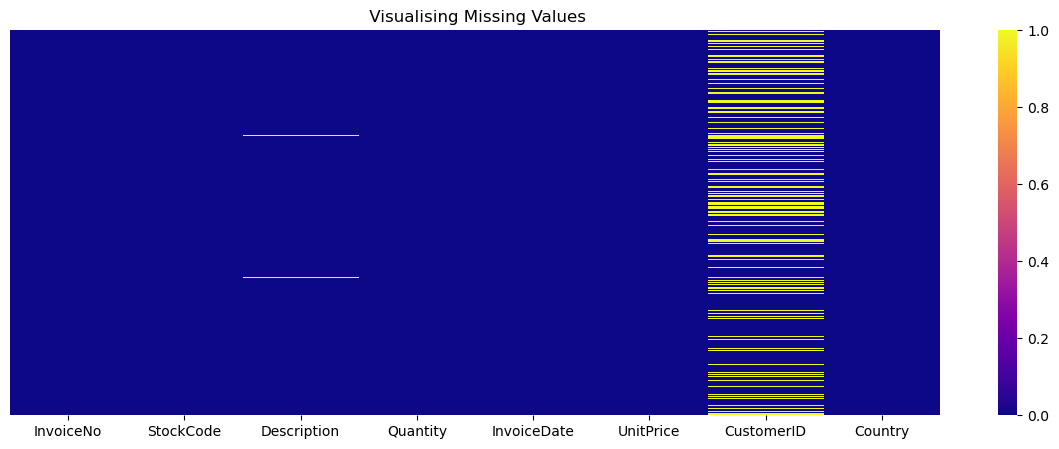

In [6]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## **Observations**
### ***Missing values in CustomerID and Description columns.***
### ***CustomerID is our identification feature so if its missing means other wont help us in analysis***
### ***Dropping that all missing datapoints***

In [8]:
retail_df.dropna(inplace=True)

In [9]:
retail_df.shape

(406829, 8)

In [10]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

* ***Here we can see that min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***Need to Explore these columns***

In [11]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [12]:
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str') #changing the datatype to str

In [13]:
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')] #also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.

In [14]:
len(retail_df[retail_df['UnitPrice']==0]) ## Checking how many values are present for unitprice==0

40

In [15]:
retail_df=retail_df[retail_df['UnitPrice']>0] # taking unitprice values greater than 0
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [16]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [17]:
retail_df.shape

(397884, 8)

# **Feature Engineering**

In [19]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [20]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [21]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [22]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [23]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [24]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

# **EDA(Exploratory Data Analysis)**

In [25]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [26]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1723
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1396
5             LUNCH BAG RED RETROSPOT   1316
6   SET OF 3 CAKE TINS PANTRY DESIGN    1159
7             LUNCH BAG  BLACK SKULL.   1105
8                             POSTAGE   1099
9     PACK OF 72 RETROSPOT CAKE CASES   1068

## ***Top 10 items in terms of description(Name)***

Text(0.5, 1.0, 'Top 10 products')

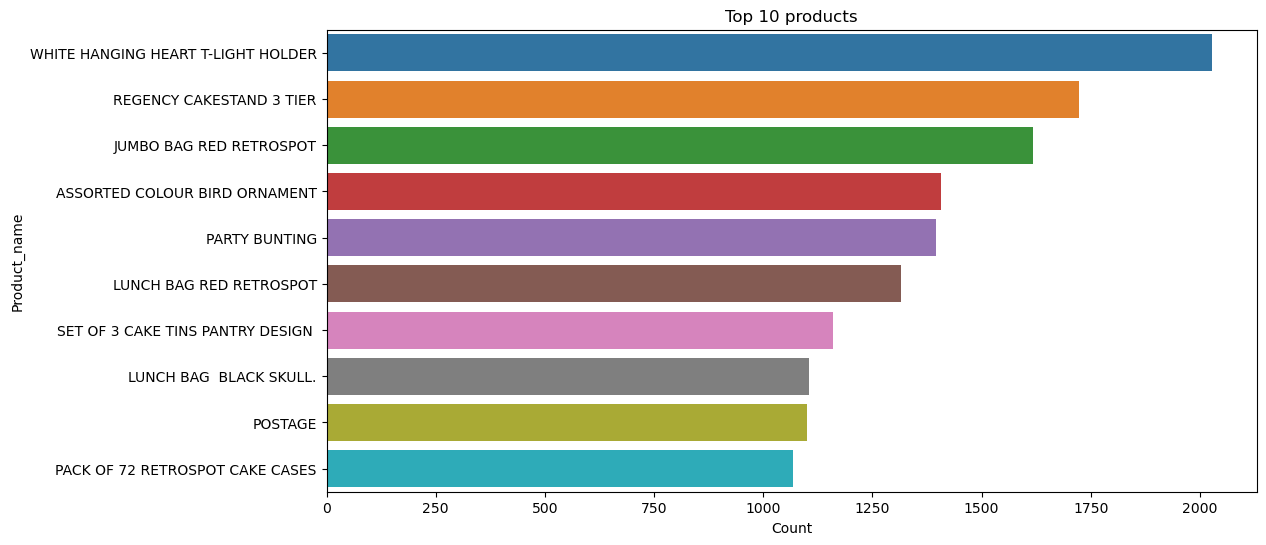

In [27]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')

### **Observations**
* ***WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold***
* ***REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold***

## ***Bottom 10 items in terms of description(Name)***

In [28]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

Product_name  Count
3867  BLUE FELT HANGING HEART WITH FLOWER      1
3868           GLASS CAKE COVER AND PLATE      1
3869           CRACKED GLAZE EARRINGS RED      1
3870              SCALLOP SHELL SOAP DISH      1
3871     NECKLACE+BRACELET SET PINK DAISY      1
3872          RUBY GLASS CLUSTER EARRINGS      1
3873       PINK CHRYSANTHEMUMS ART FLOWER      1
3874      72 CAKE CASES VINTAGE CHRISTMAS      1
3875         WALL ART , THE MAGIC FOREST       1
3876          PAPER CRAFT , LITTLE BIRDIE      1

Text(0.5, 1.0, 'Bottom 10 products')

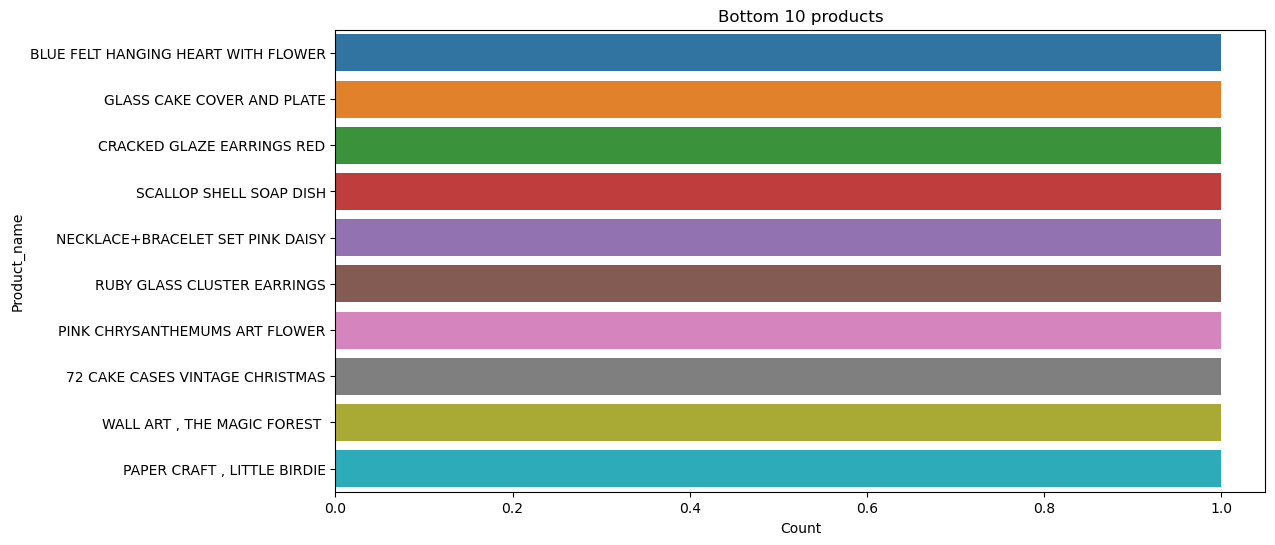

In [29]:
# bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

## ***Top 10 items in terms of StockCode.***

In [90]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

StockCode  Count
0    85123A   2035
1     22423   1723
2    85099B   1618
3     84879   1408
4     47566   1396
5     20725   1317
6     22720   1159
7     20727   1105
8      POST   1099
9     23203   1098

Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

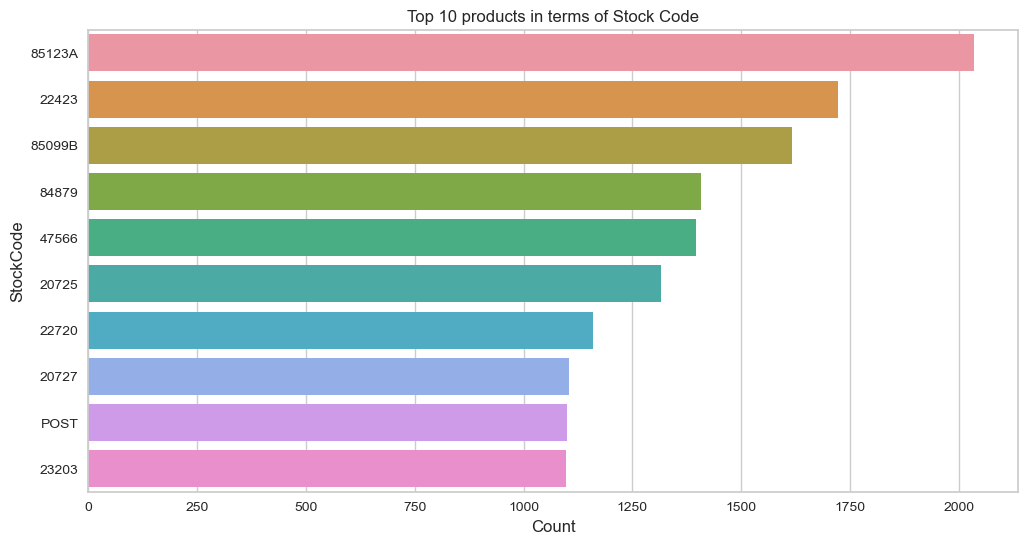

In [91]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

In [93]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Products_purchasing_Count
0     17841.0                       7847
1     14911.0                       5675
2     14096.0                       5111
3     12748.0                       4595
4     14606.0                       2700
5     15311.0                       2379
6     14646.0                       2076
7     13089.0                       1818
8     13263.0                       1677
9     14298.0                       1637

Text(0.5, 1.0, 'Top 10 frequent Customers.')

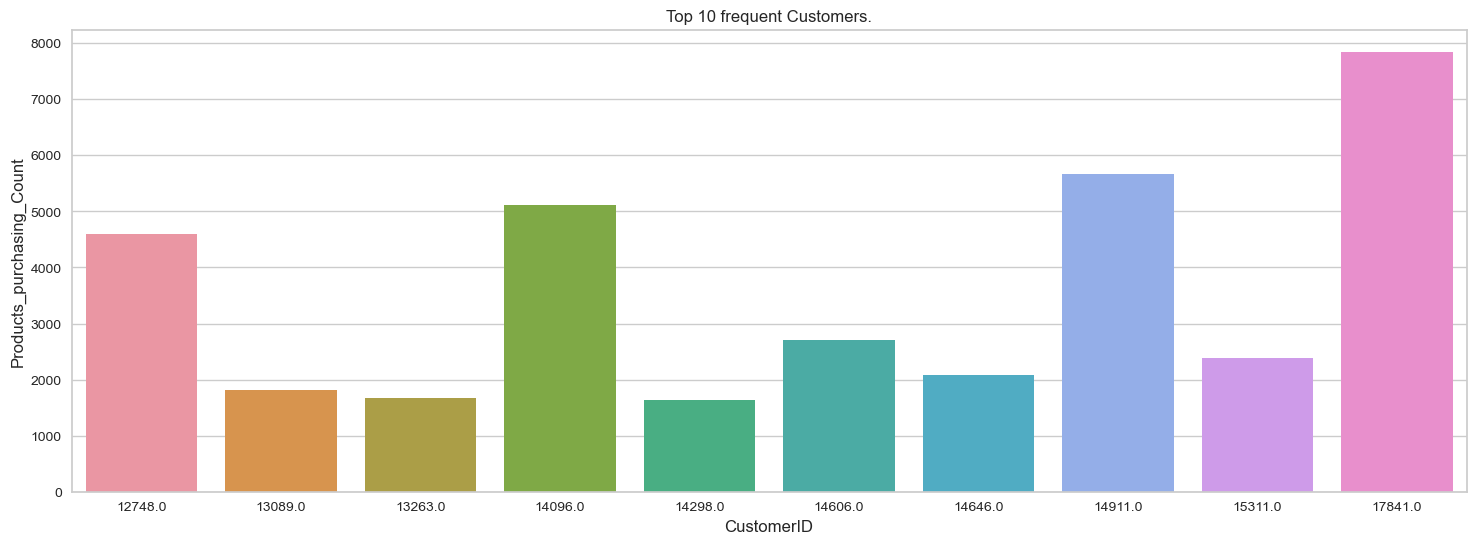

In [94]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

In [95]:
top_5_countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries

Country  Customer_count
0         United Kingdom          354321
1                Germany            9040
2                 France            8341
3                   EIRE            7236
4                  Spain            2484
5            Netherlands            2359
6                Belgium            2031
7            Switzerland            1841
8               Portugal            1462
9              Australia            1182
10                Norway            1071
11                 Italy             758
12       Channel Islands             748
13               Finland             685
14                Cyprus             614
15                Sweden             451
16               Austria             398
17               Denmark             380
18                Poland             330
19                 Japan             321
20                Israel             248
21           Unspecified             244
22             Singapore             222
23               Iceland             182
24                   USA             179
25                Canada             151
26                Greece             145
27                 Malta             112
28  United Arab Emirates              68
29    European Community              60
30                   RSA              57
31               Lebanon              45
32             Lithuania              35
33                Brazil              32
34        Czech Republic              25
35               Bahrain              17
36          Saudi Arabia               9

Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

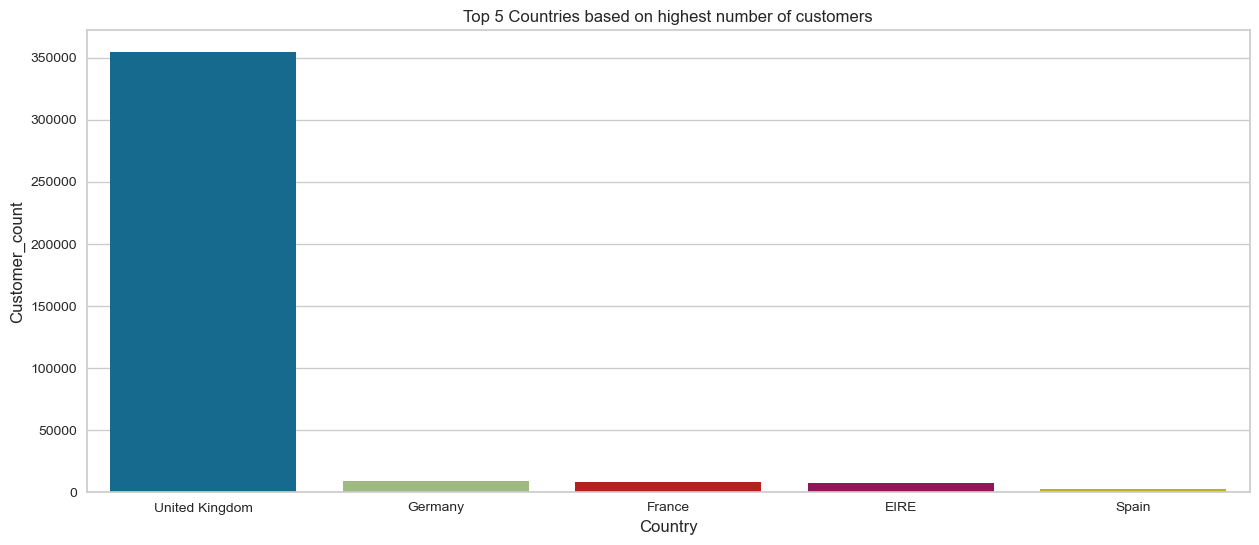

In [96]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

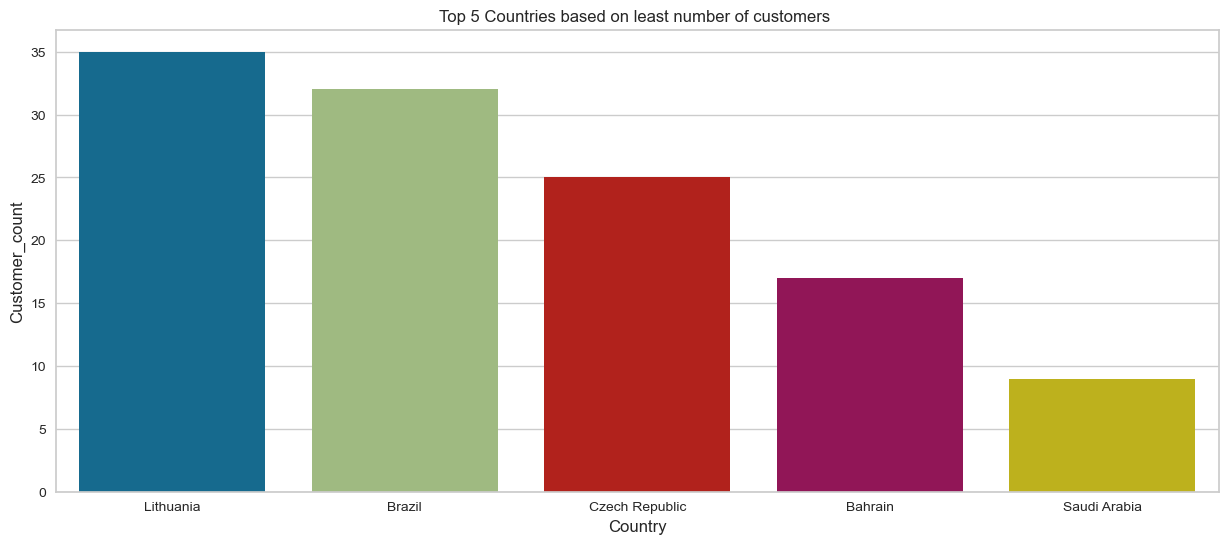

In [97]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

In [98]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0    November        64531
1     October        49554
2    December        43461
3   September        40028
4         May        28320
5        June        27185
6       March        27175
7      August        27007
8        July        26825
9       April        22642
10    January        21229
11   February        19927

Text(0.5, 1.0, 'Sales count in different Months ')

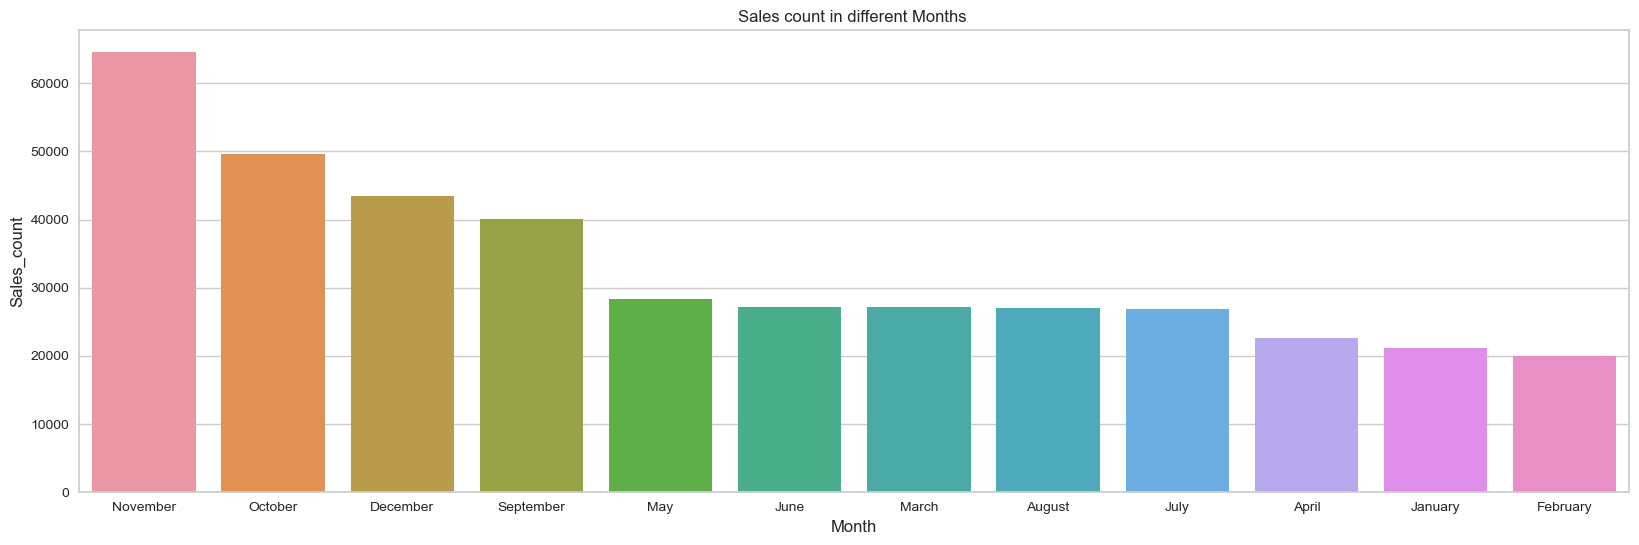

In [99]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

In [100]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

Day  Sale_count
0   Thursday       80035
1  Wednesday       68885
2    Tuesday       66473
3     Monday       64893
4     Sunday       62773
5     Friday       54825

Text(0.5, 1.0, 'Sales count on different Days ')

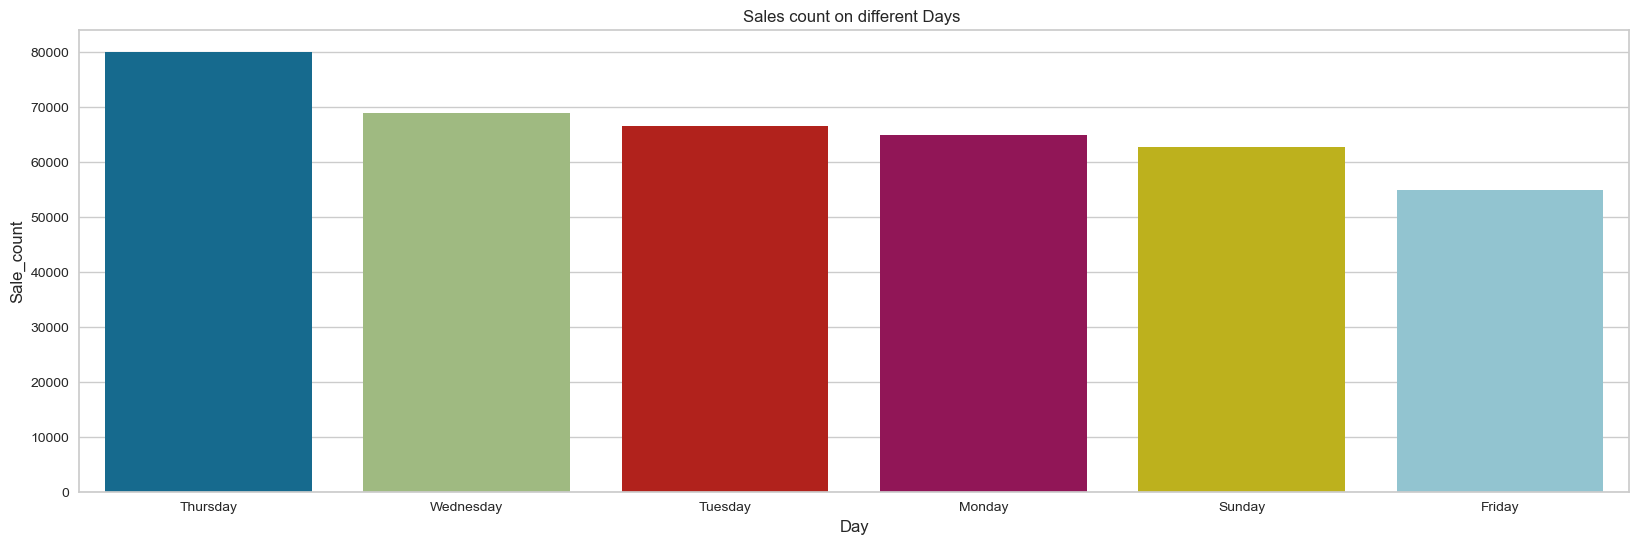

In [101]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

# Model Building:

### RFM Model Analysis:

In [30]:
rfm_dataframe=retail_df.copy()
rfm_dataframe.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

In [31]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice no. of transaction(s), 
#Monetary = Sum of Total 
#Amount for each customer

import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [32]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

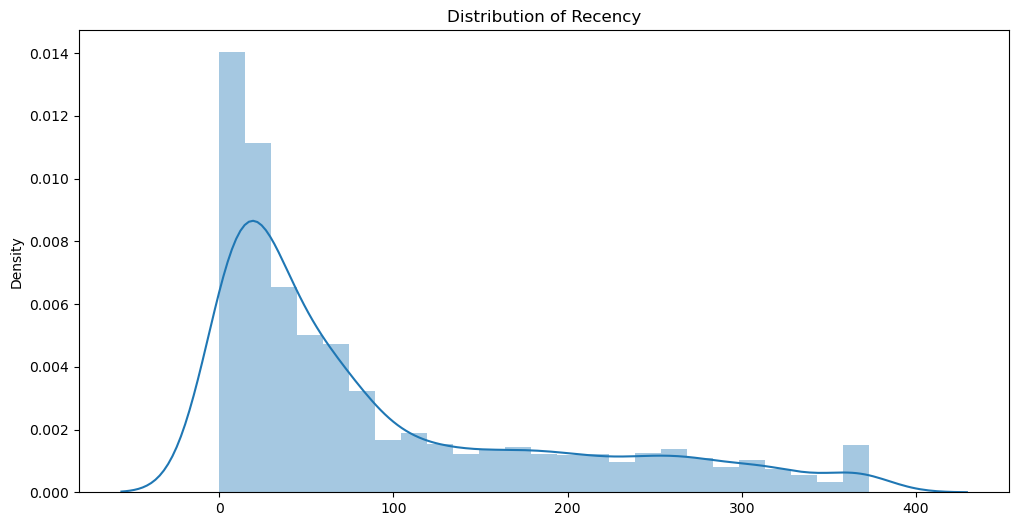

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

In [34]:
# Descriptive Stats= Frequency
rfm_dataframe['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

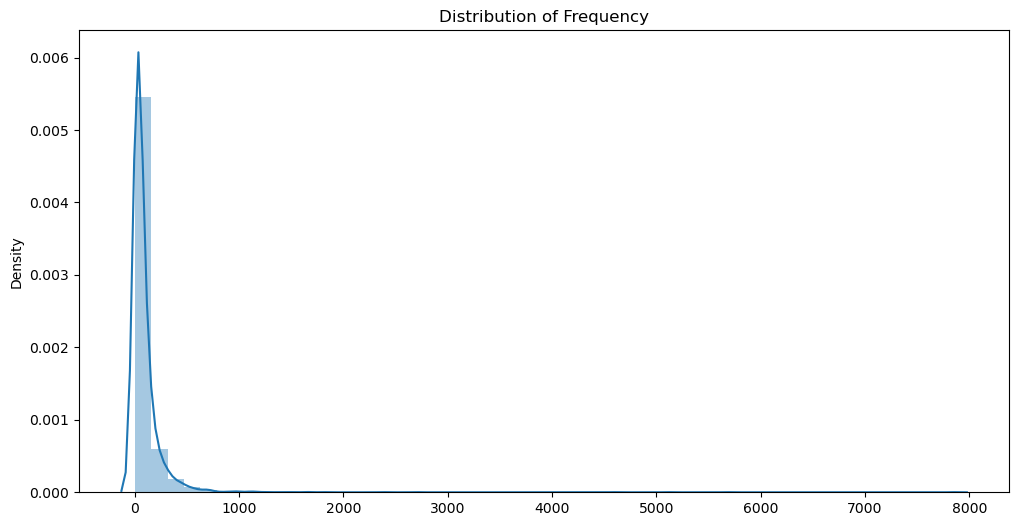

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

In [36]:
# Descriptive Stats= Monetary
rfm_dataframe['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

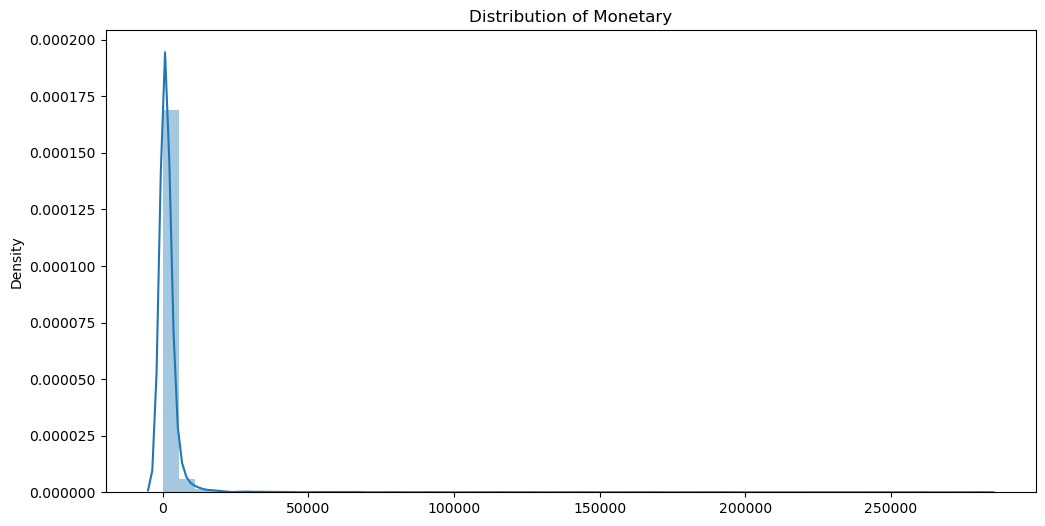

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

In [38]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [39]:
quantile = quantile.to_dict()

In [40]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [41]:
#Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [42]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [43]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [44]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  3       443         11

In [45]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int32  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 288.1+ KB


In [46]:
# Assign Loyalty Level to each customer

Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  2  1       221          5   
4     12350.0      310         17    334.40  4  4  3       443         11   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3         Platinaum  
4             Bronz

In [47]:
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2379   60767.90  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

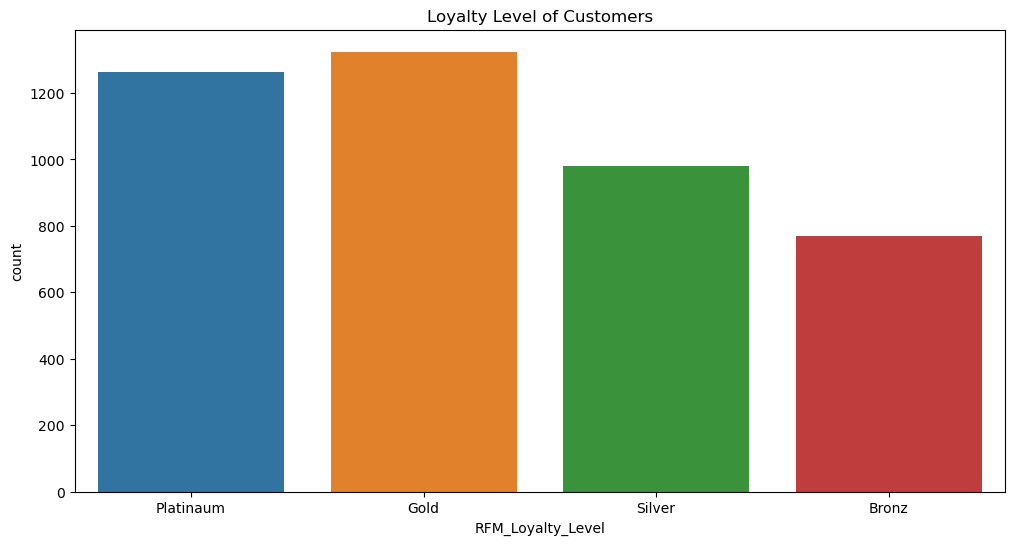

In [48]:


plt.figure(figsize=(12, 6))
sns.countplot(data=rfm_dataframe, x='RFM_Loyalty_Level')
plt.title('Loyalty Level of Customers')
plt.show()

In [49]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1400  117379.63  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        242   81024.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
columns_to_standardize = ['Recency', 'Frequency', 'Monetary']

scaler = StandardScaler()
standardized_values = scaler.fit_transform(rfm_dataframe[columns_to_standardize])


for i, col in enumerate(columns_to_standardize):
    new_col_name = f'{col}_Standardized'
    rfm_dataframe[new_col_name] = standardized_values[:, i]

In [52]:
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RFM_Loyalty_Level  Recency_Standardized  Frequency_Standardized  \
CustomerID                                                                   
12346.0               Silver              2.329388               -0.396578   
12347.0            Platinaum             -0.900588                0.394649   
12348.0                 Gold             -0.170593               -0.265435   
12349.0            Platinaum             -0.740589               -0.081836   
12350.0                Bronz              2.179389               -0.326635   

            Monetary_Standardized  
CustomerID                         
12346.0                  8.358668  
12347.0                  0.250966  
12348.0                 -0.028596  
12349.0                 -0.033012  
12350.0                 -0.191347

# **1) KMeans Clustering:**

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##***A)  Applying Elbow Method on Recency and Monetary.***

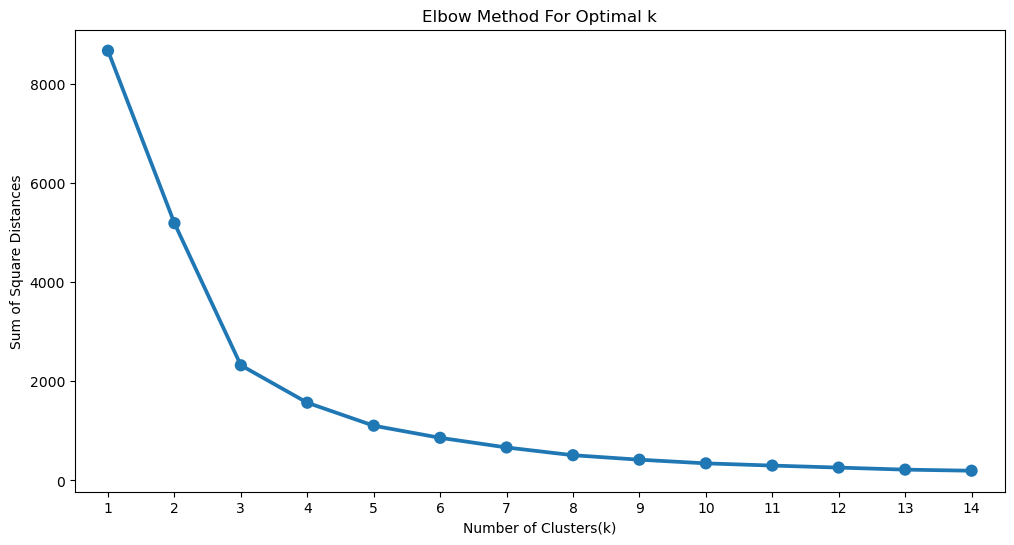

In [54]:
Recency_and_Monetary_feat=['Recency_Standardized','Monetary_Standardized']
# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values



#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 3.**

### ***Cross verifying with ElbowVisualizar***
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [55]:
!pip install yellowbrick

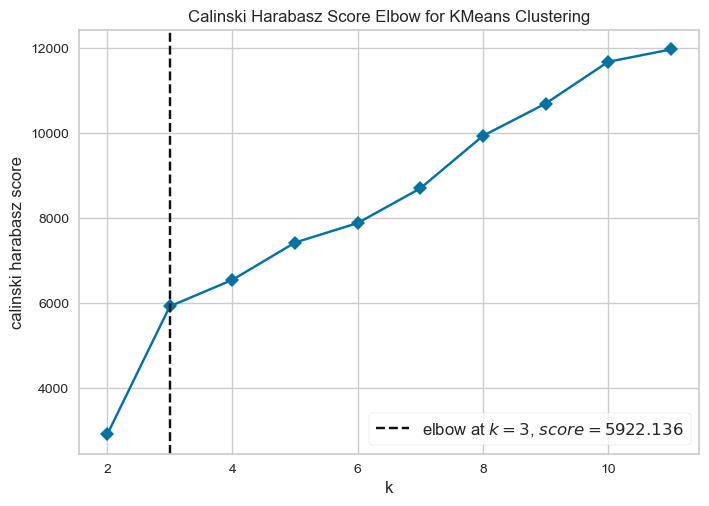

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [56]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### It is giving value 3

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=3)***

In [57]:
Recency_and_Monetary_feat=['Recency_Standardized','Monetary_Standardized']

X=rfm_dataframe[Recency_and_Monetary_feat].values

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.6667825831235739
For n_clusters = 3, silhouette score is 0.6823709015912732
For n_clusters = 4, silhouette score is 0.6939131576353929
For n_clusters = 5, silhouette score is 0.5978731804835471
For n_clusters = 6, silhouette score is 0.602060709496328
For n_clusters = 7, silhouette score is 0.49380519776575216
For n_clusters = 8, silhouette score is 0.5244846978010175
For n_clusters = 9, silhouette score is 0.50148218659073
For n_clusters = 10, silhouette score is 0.5140455878223766
For n_clusters = 11, silhouette score is 0.5051203946992098
For n_clusters = 12, silhouette score is 0.49808386927256054
For n_clusters = 13, silhouette score is 0.49400074908892316
For n_clusters = 14, silhouette score is 0.45809656487652817
For n_clusters = 15, silhouette score is 0.4329076854369583


***Here we can see the for n_cluster=3,4 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

## **Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=3)***

For n_clusters = 2 The average silhouette_score is : 0.6667825831235739
For n_clusters = 3 The average silhouette_score is : 0.6823709015912732
For n_clusters = 4 The average silhouette_score is : 0.6939131576353929
For n_clusters = 5 The average silhouette_score is : 0.5978731804835471
For n_clusters = 6 The average silhouette_score is : 0.602060709496328
For n_clusters = 7 The average silhouette_score is : 0.49380519776575216
For n_clusters = 8 The average silhouette_score is : 0.5244846978010175
For n_clusters = 9 The average silhouette_score is : 0.50148218659073
For n_clusters = 10 The average silhouette_score is : 0.5140455878223766


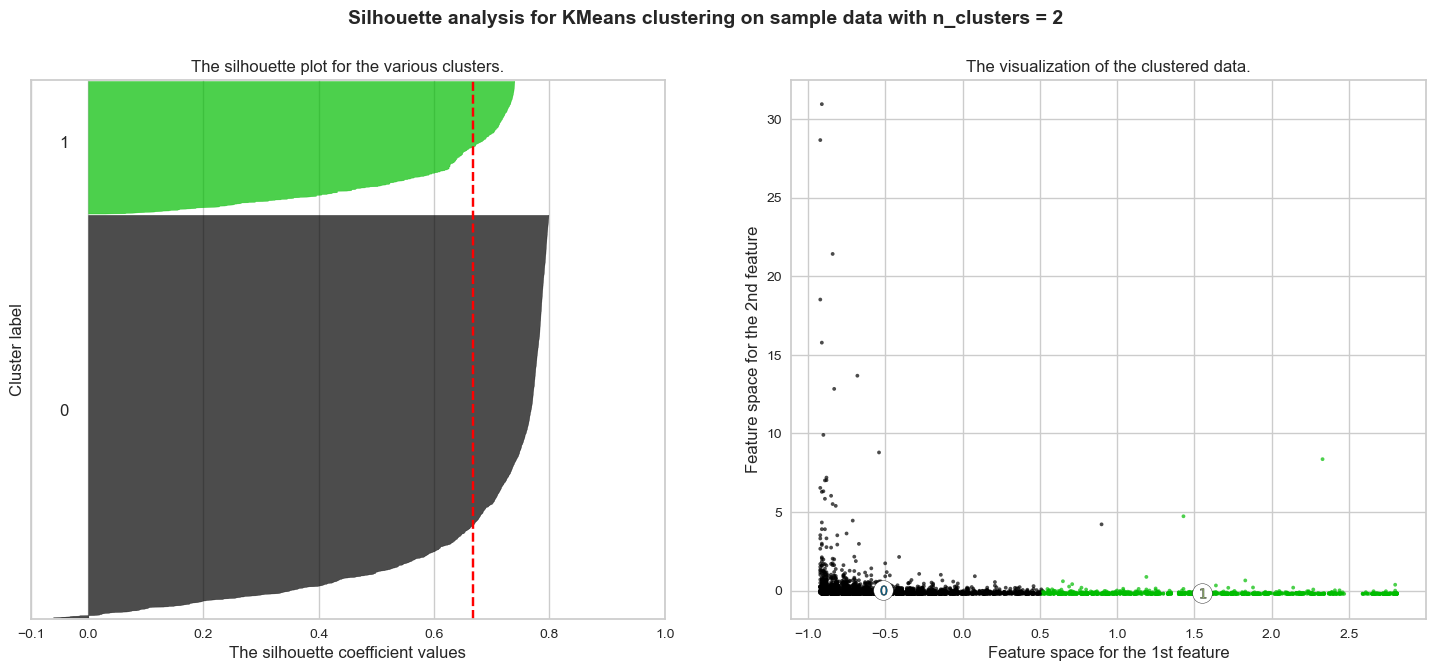

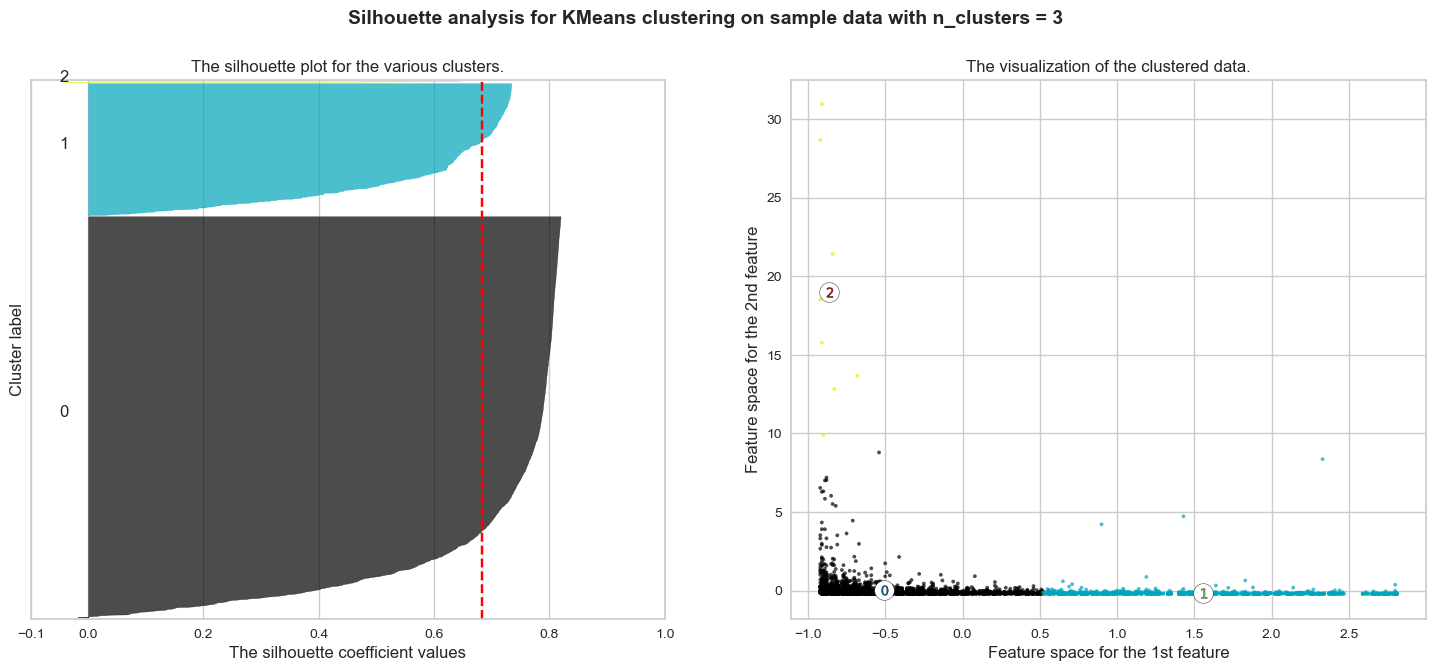

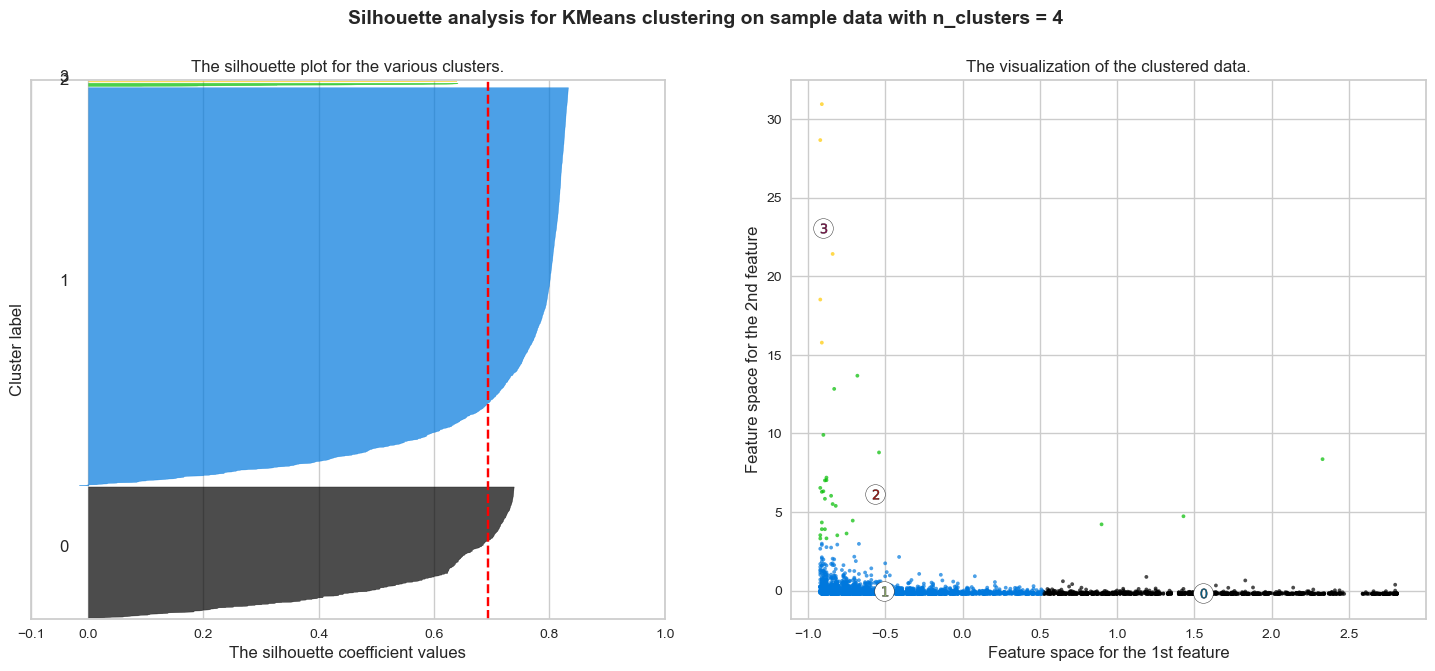

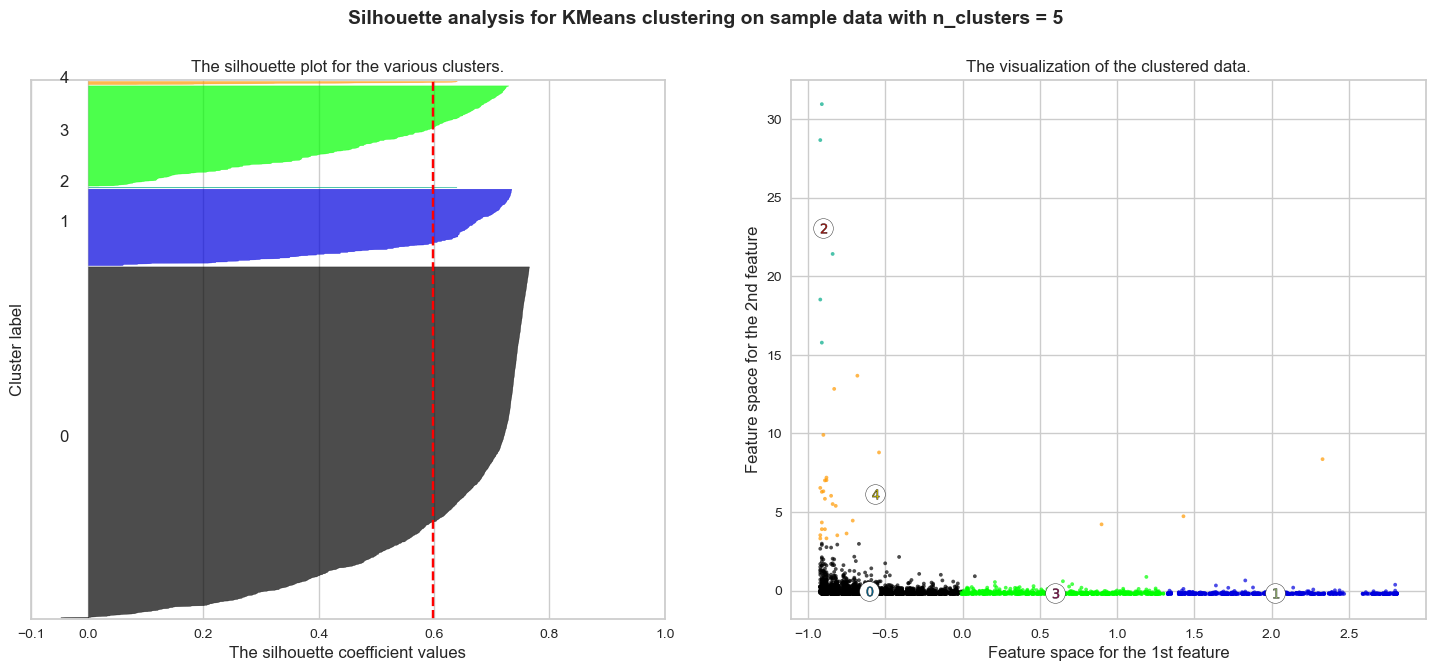

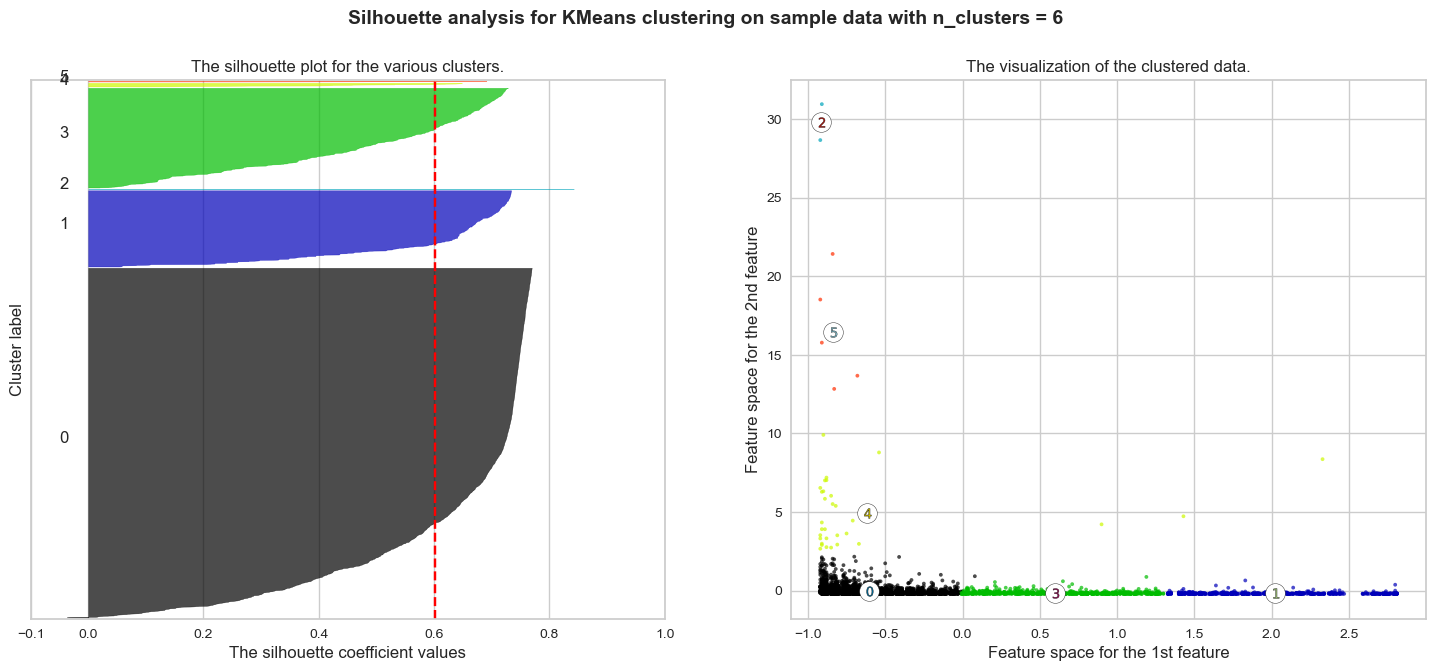

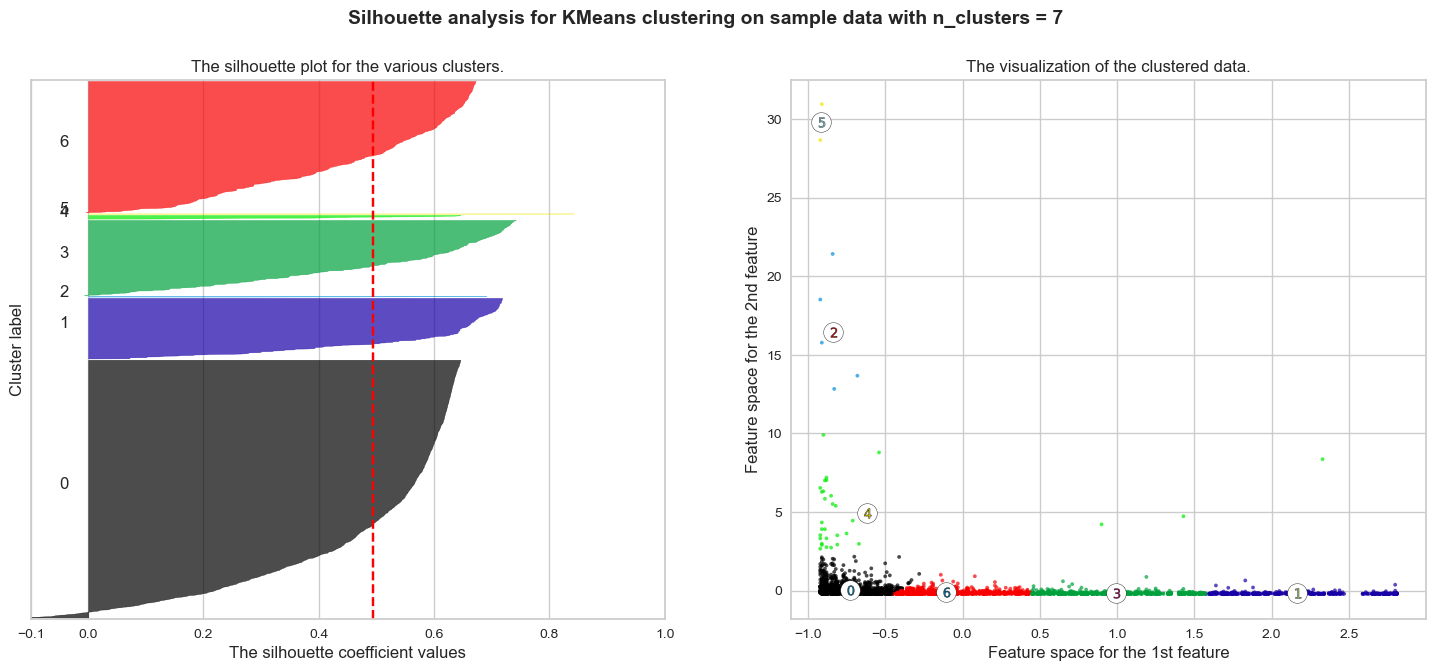

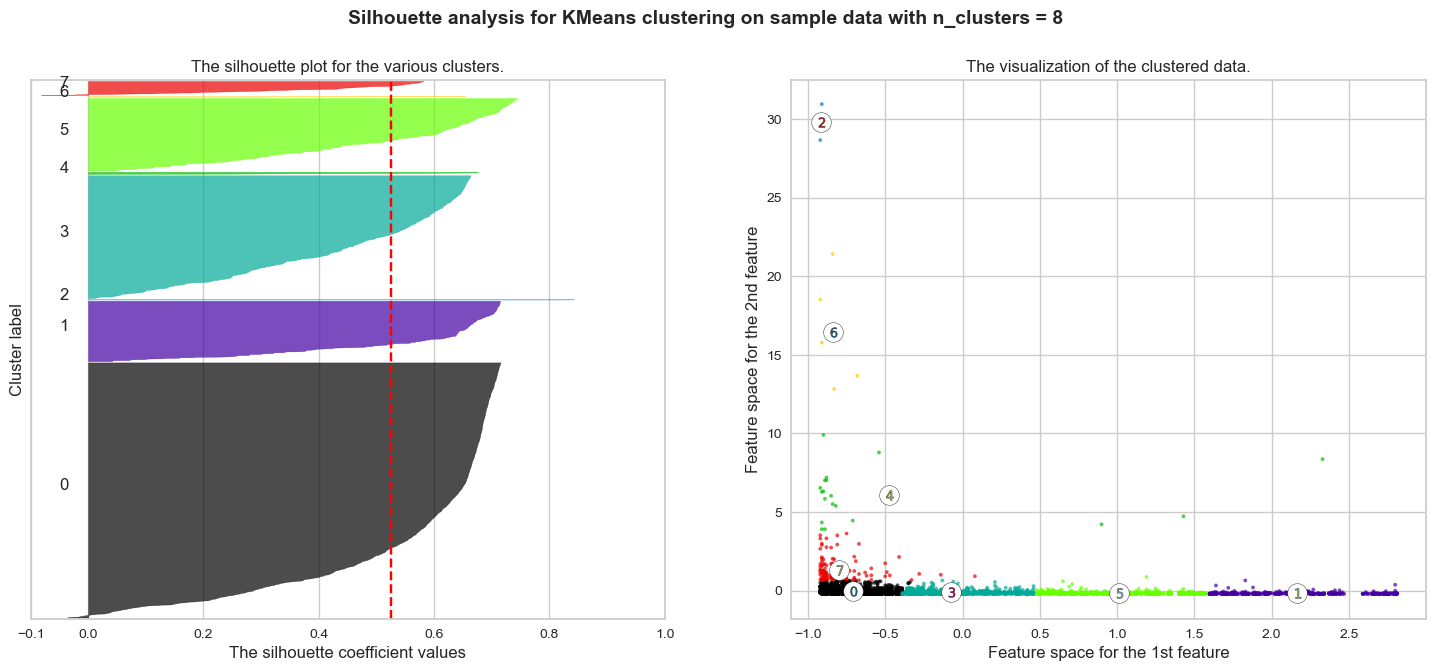

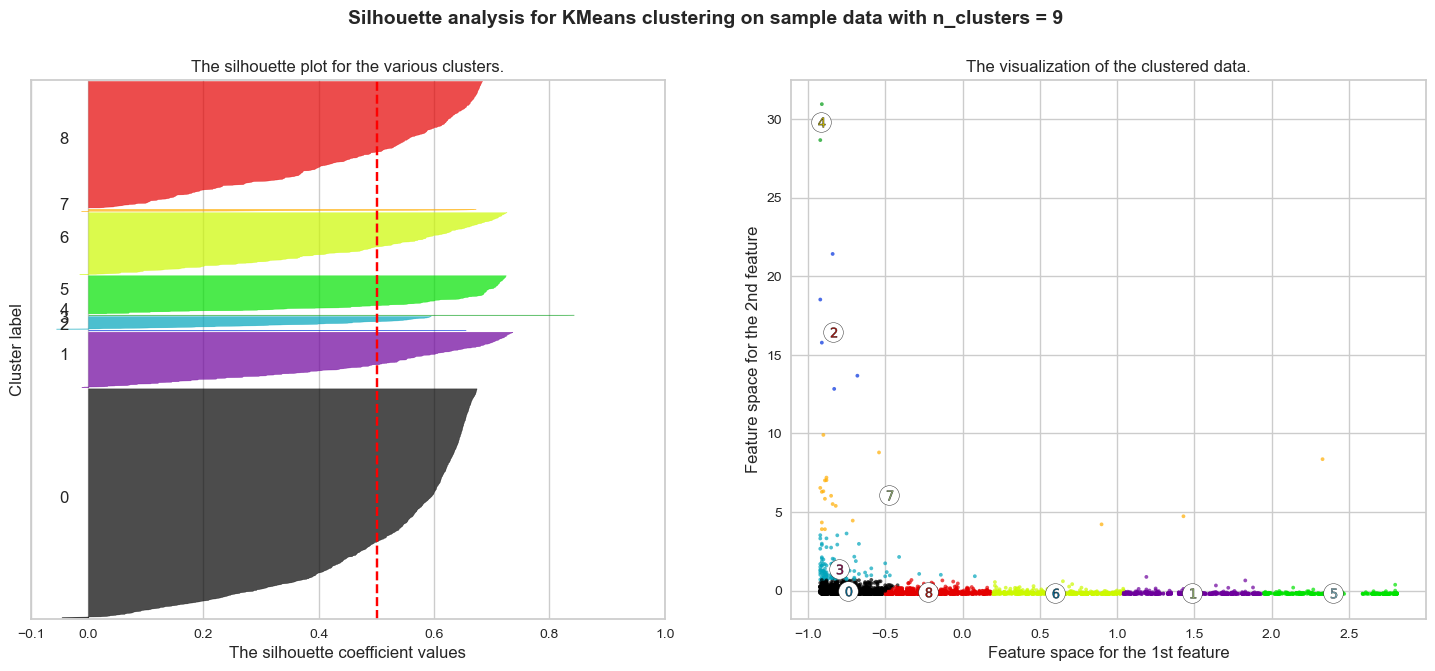

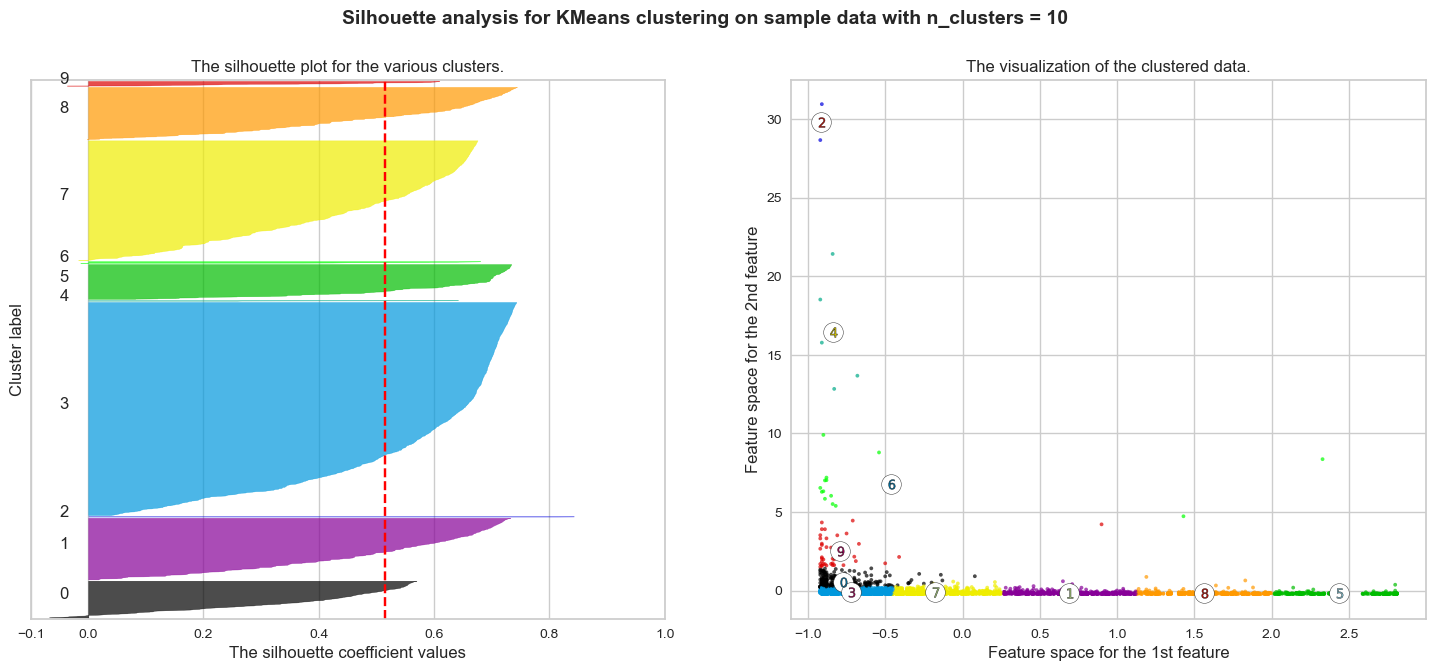

In [58]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### **Observations**

* ***We got good Silhouette plot for Cluster-3,4  but still few datapoints are on the negative side of the Silhouette Coefficient value of 4 as shown in above figure. but its better than others. So we will take only value 3***

In [59]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=3)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [60]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_Standardized  Frequency_Standardized  \
CustomerID                                                                   
12346.0               Silver              2.329388               -0.396578   
12347.0            Platinaum             -0.900588                0.394649   
12348.0                 Gold             -0.170593               -0.265435   
12349.0            Platinaum             -0.740589               -0.081836   
12350.0                Bronz              2.179389               -0.326635   
12352.0            Platinaum             -0.560591               -0.029379   
12353.0                Bronz              1.119397               -0.383463   
12354.0                 Gold              1.399395               -0.147407   
12355.0                Bronz              1.219396               -0.344121   
12356.0            Platinaum             -0.700590               -0.143035   

            Monetary_Standardized  Cluster_based_rec_mon  
CustomerID                                                
12346.0                  8.358668                      1  
12347.0                  0.250966                      0  
12348.0                 -0.028596                      0  
12349.0                 -0.033012                      0  
12350.0                 -0.191347                      1  
12352.0                  0.050263                      0  
12353.0                 -0.218650                      1  
12354.0                 -0.108461                      1  
12355.0                 -0.177440                      1  
12356.0                  0.084240                      0

In [61]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[-5.09826719e-01,  4.89236926e-03],
       [ 1.55590500e+00, -1.56392954e-01],
       [-8.64338382e-01,  1.89642385e+01]])

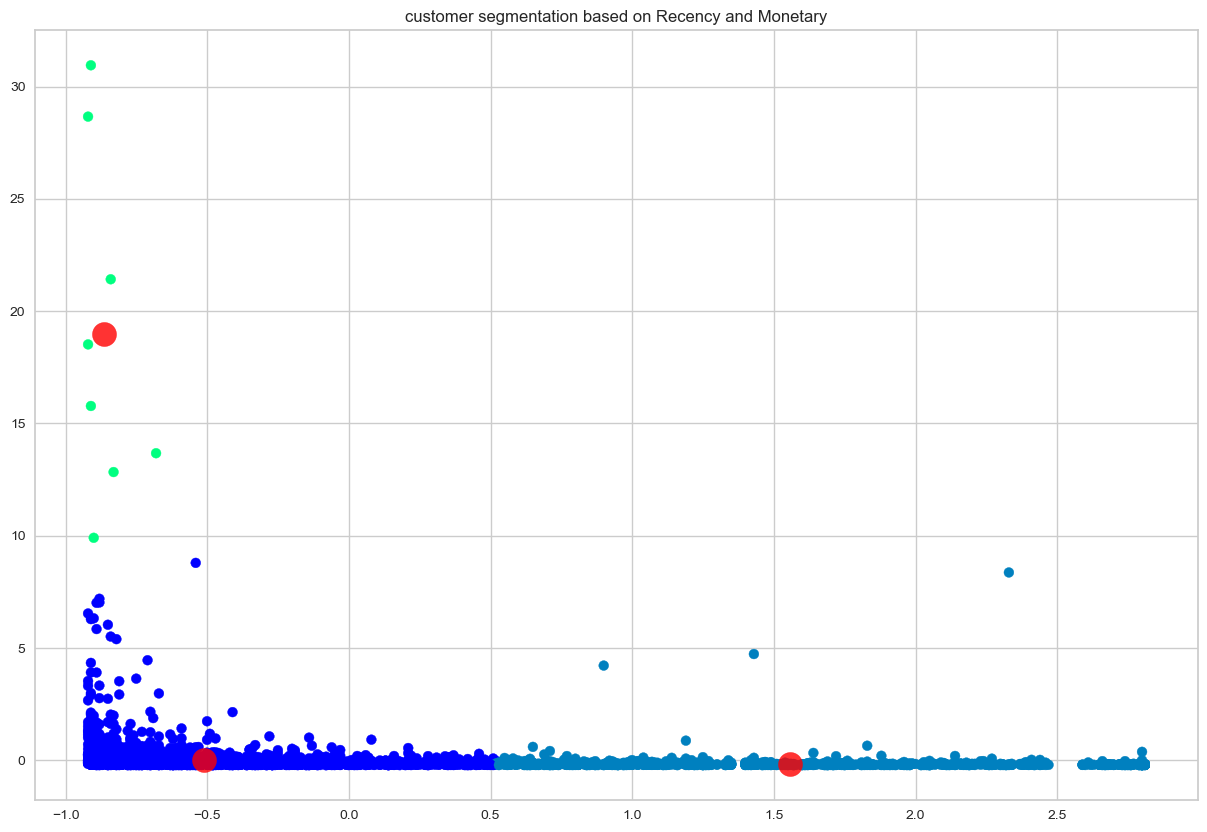

In [62]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

##***B)  Applying Elbow Method on Frequency and Monetary.***

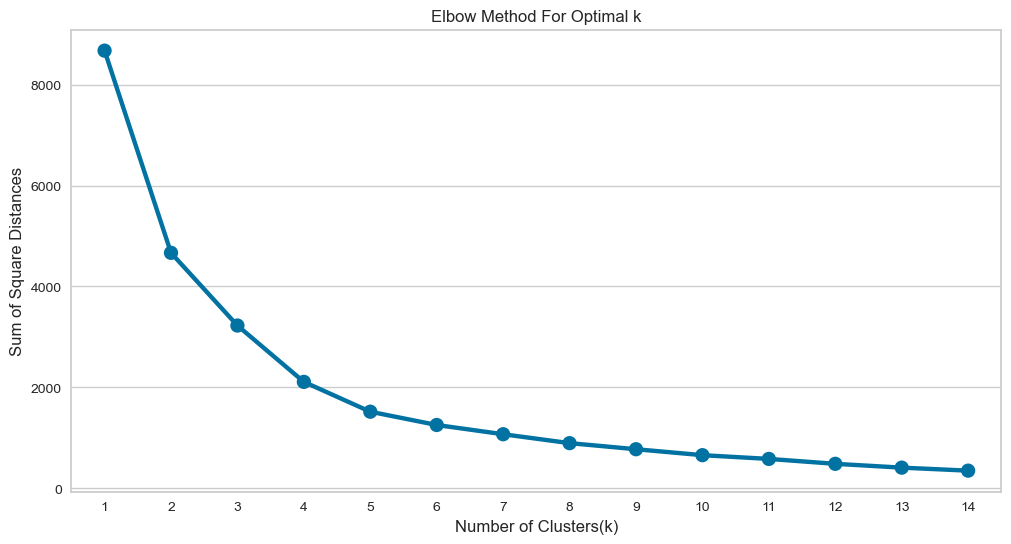

In [63]:
Frequency_and_Monetary_feat=['Frequency_Standardized','Monetary_Standardized']
# taking only values of recency and monetory in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values


#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

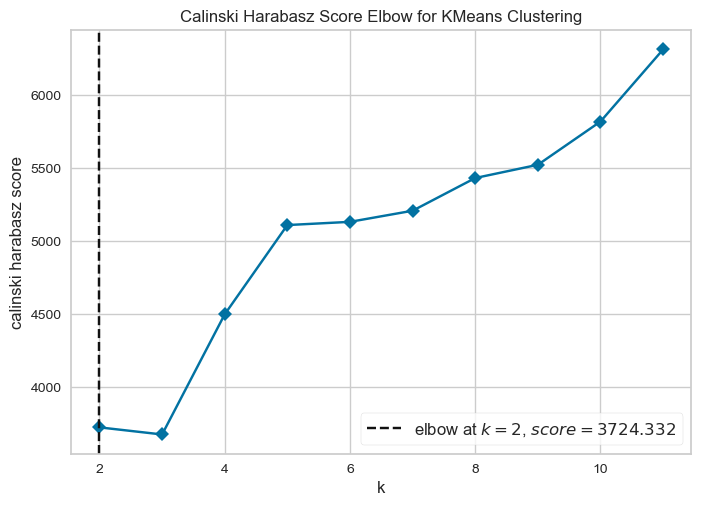

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [64]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##**Here we can see that Optimal value for cluster came out to be 2.**

## **Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [65]:
Frequency_and_Monetary_feat=['Frequency_Standardized','Monetary_Standardized']
# taking only values of recency and monetory in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values
#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))



For n_clusters = 2, silhouette score is 0.969515630896814
For n_clusters = 3, silhouette score is 0.9713848706255012
For n_clusters = 4, silhouette score is 0.8076766997698216
For n_clusters = 5, silhouette score is 0.7733623140684566
For n_clusters = 6, silhouette score is 0.7063697028110437
For n_clusters = 7, silhouette score is 0.6947199643862644
For n_clusters = 8, silhouette score is 0.6607339783735486
For n_clusters = 9, silhouette score is 0.635115428872117
For n_clusters = 10, silhouette score is 0.6056317624642183
For n_clusters = 11, silhouette score is 0.607747840094577
For n_clusters = 12, silhouette score is 0.6188229362717342
For n_clusters = 13, silhouette score is 0.5779377557068035
For n_clusters = 14, silhouette score is 0.5798507309836398
For n_clusters = 15, silhouette score is 0.5817687561571816


***Here we can see the for n_cluster=2,3 silhouette scores are good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.969515630896814
For n_clusters = 3 The average silhouette_score is : 0.9713848706255012
For n_clusters = 4 The average silhouette_score is : 0.8076766997698216
For n_clusters = 5 The average silhouette_score is : 0.7733623140684566
For n_clusters = 6 The average silhouette_score is : 0.7063697028110437
For n_clusters = 7 The average silhouette_score is : 0.6947199643862644
For n_clusters = 8 The average silhouette_score is : 0.6607339783735486
For n_clusters = 9 The average silhouette_score is : 0.635115428872117
For n_clusters = 10 The average silhouette_score is : 0.6056317624642183


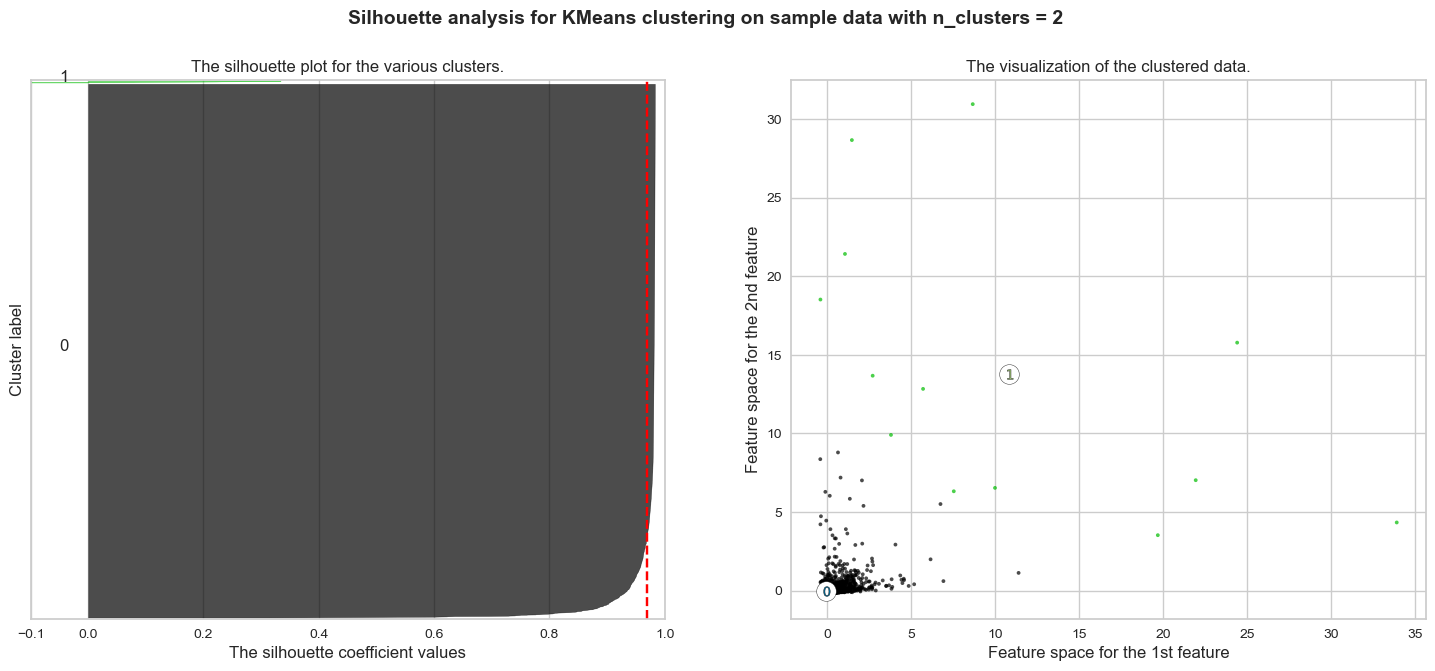

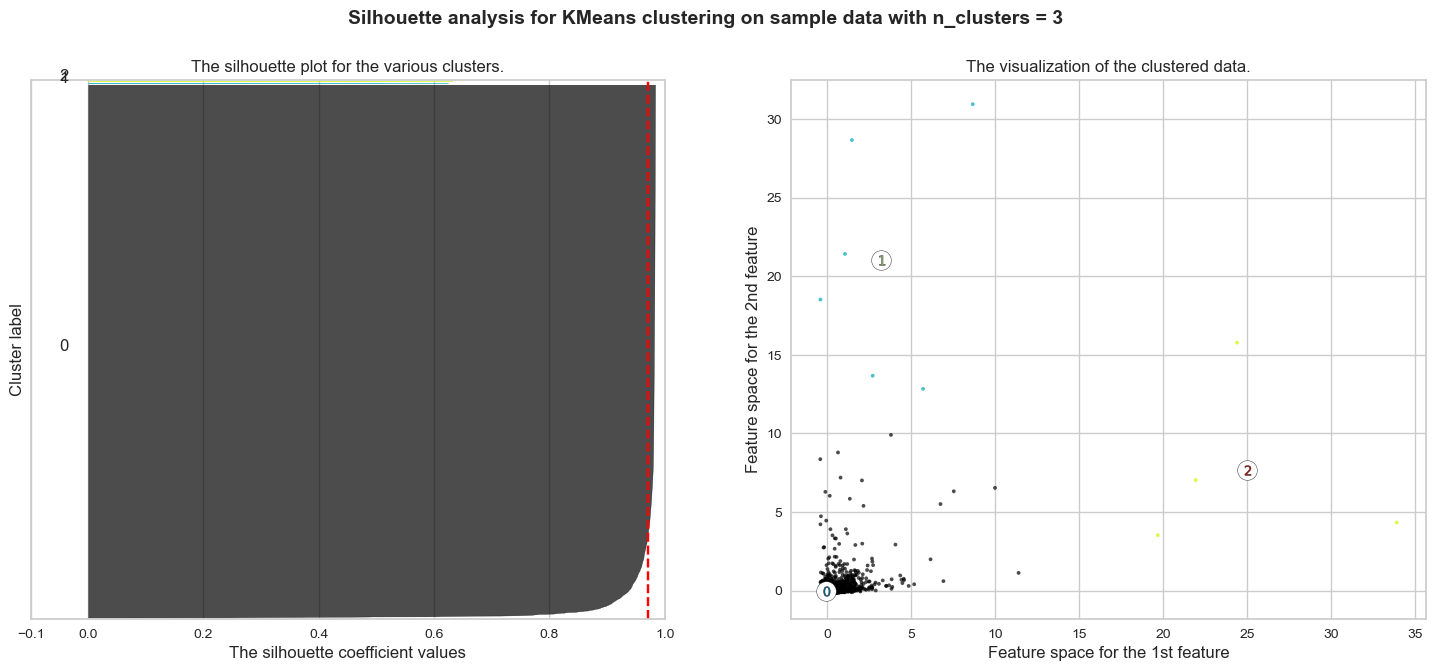

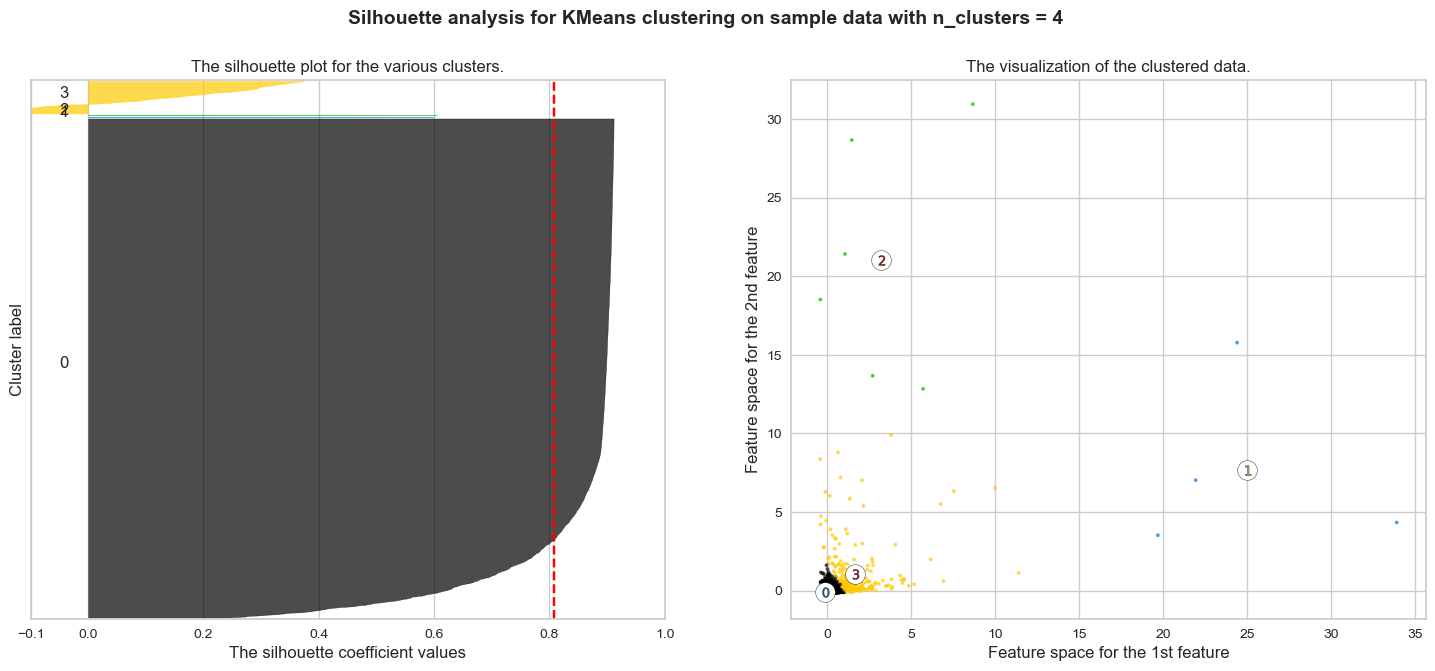

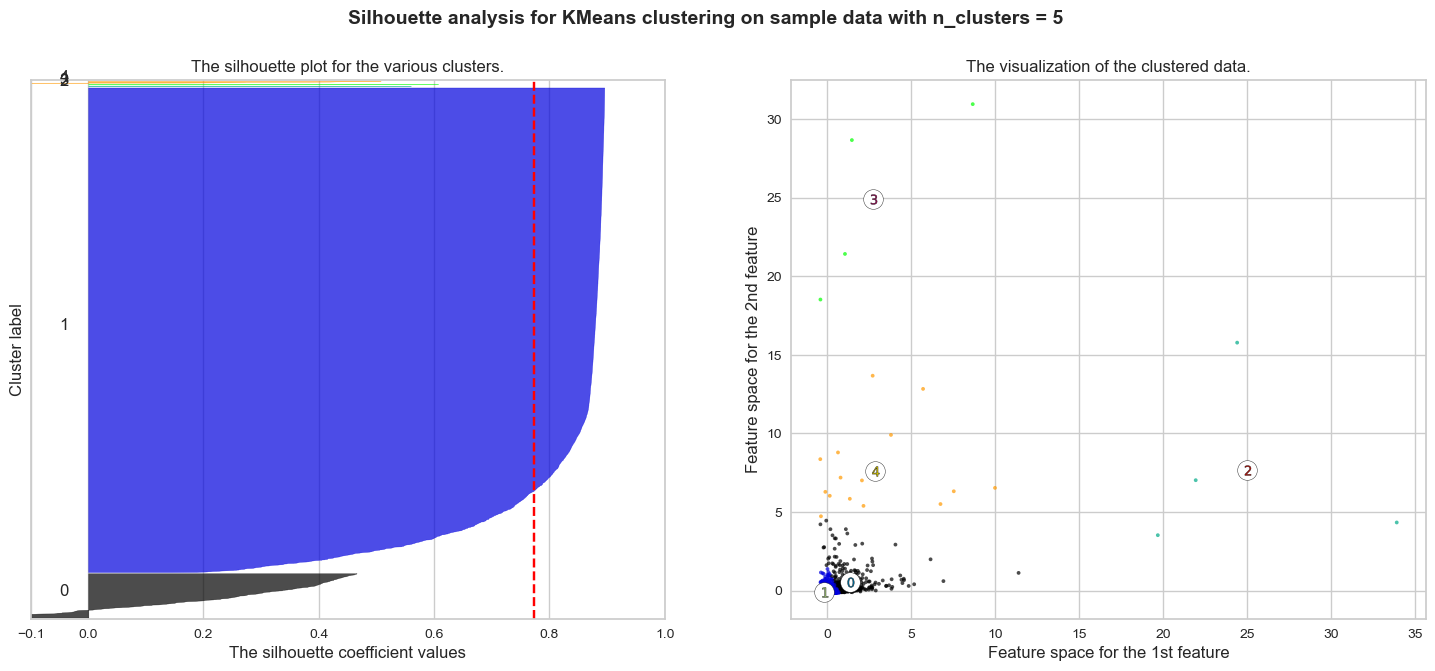

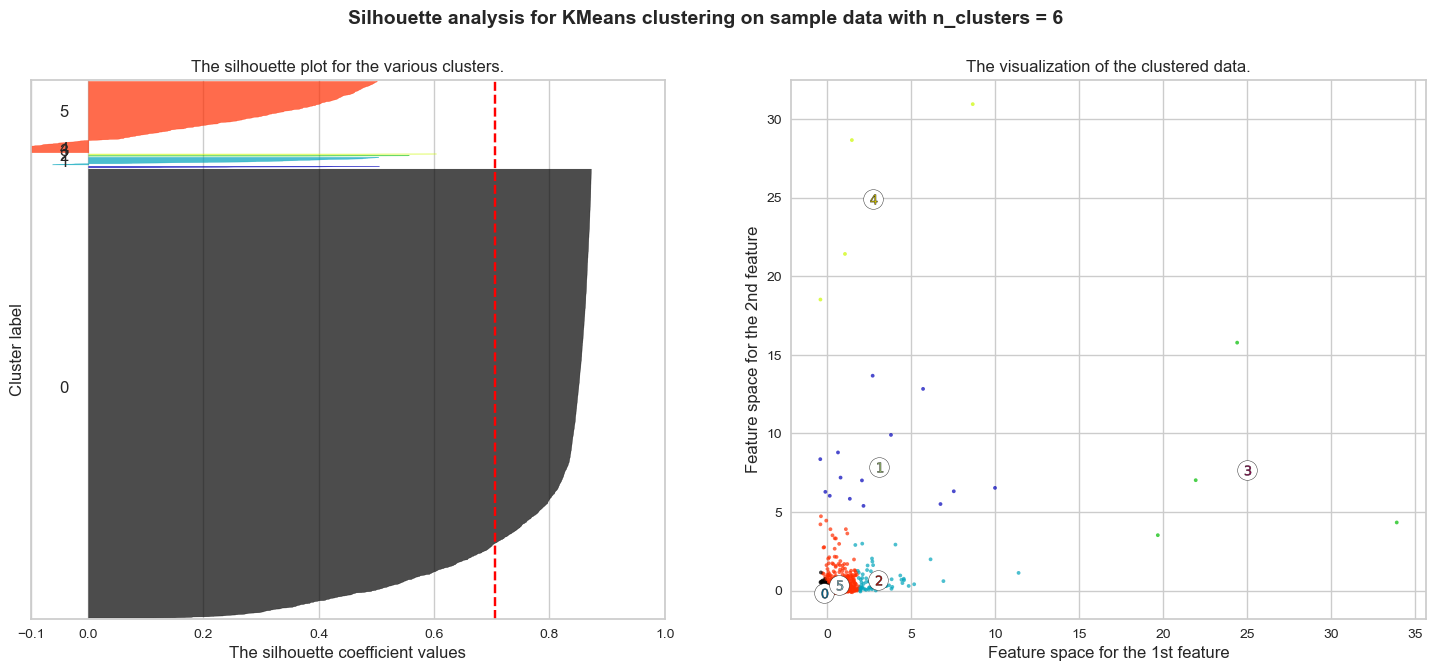

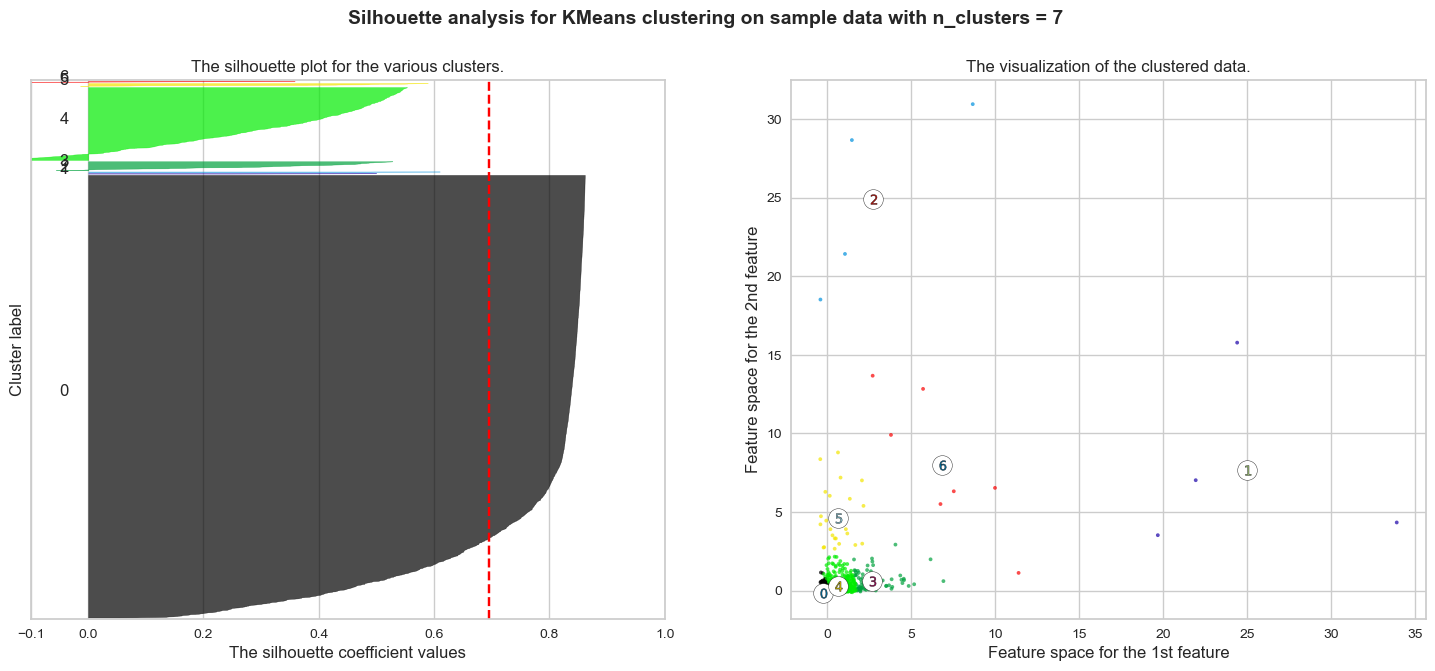

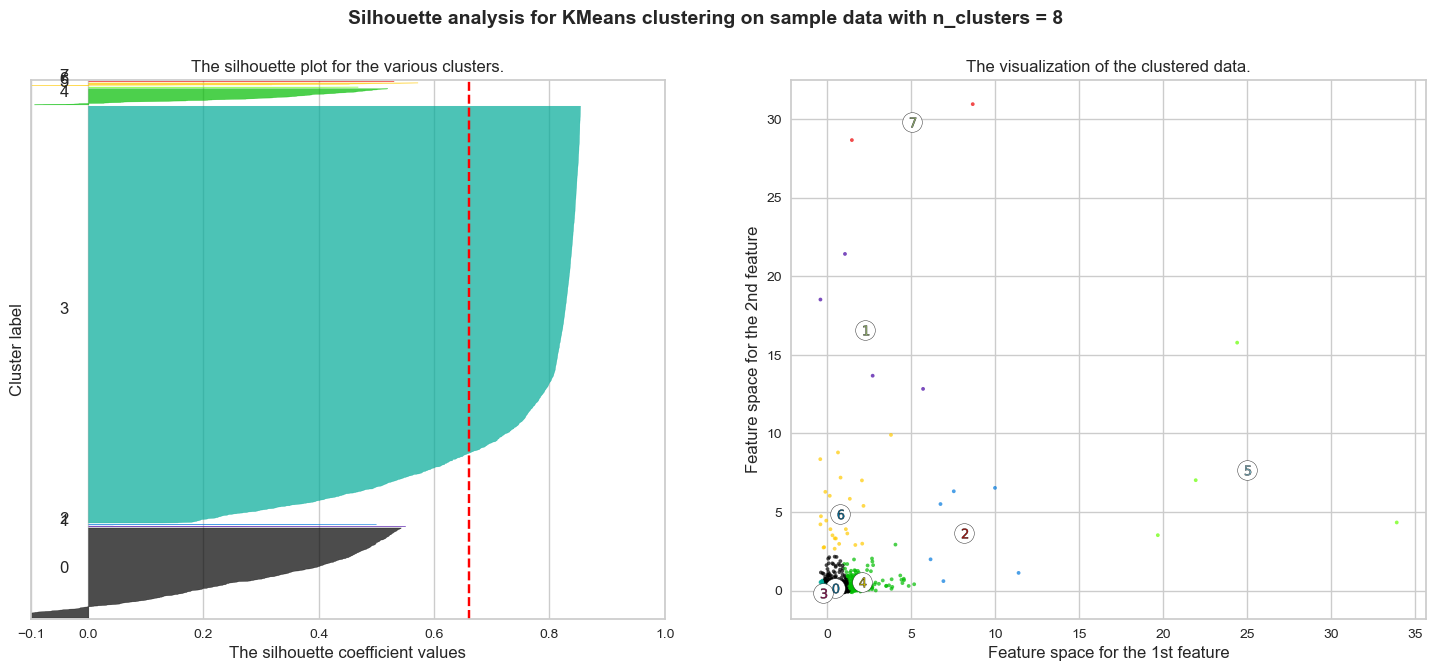

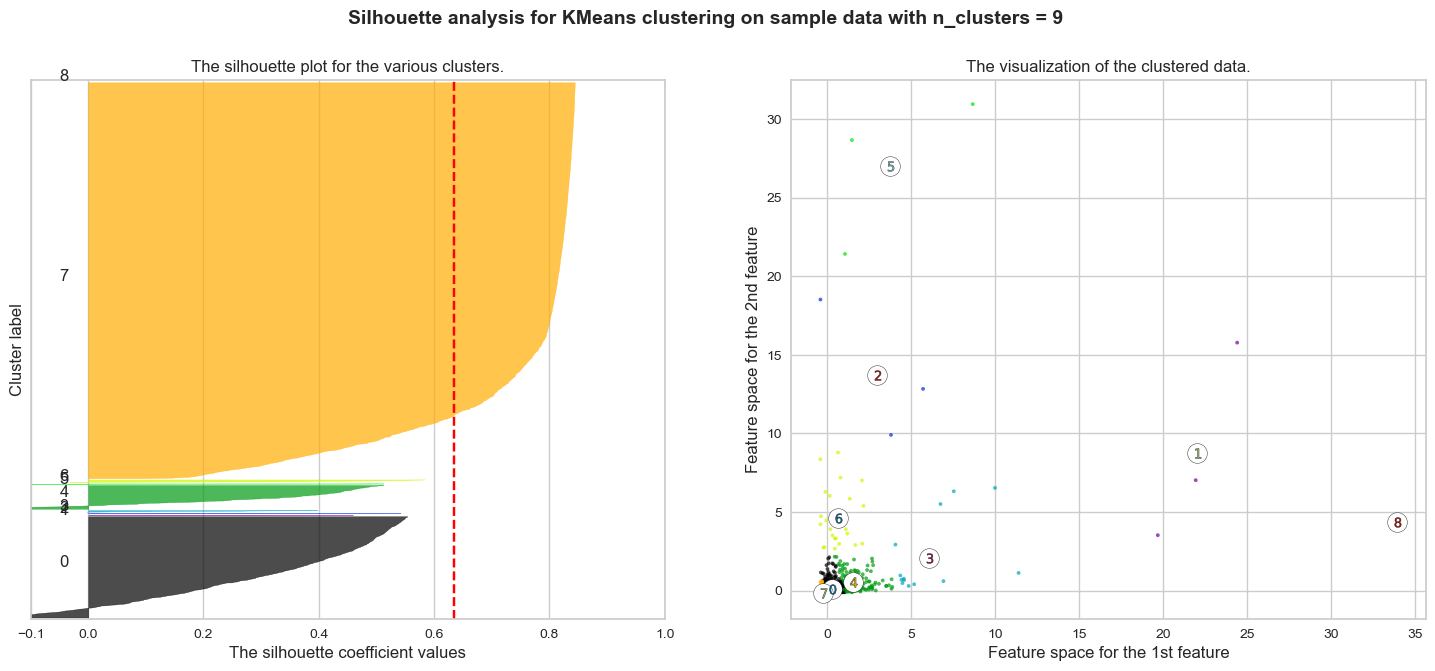

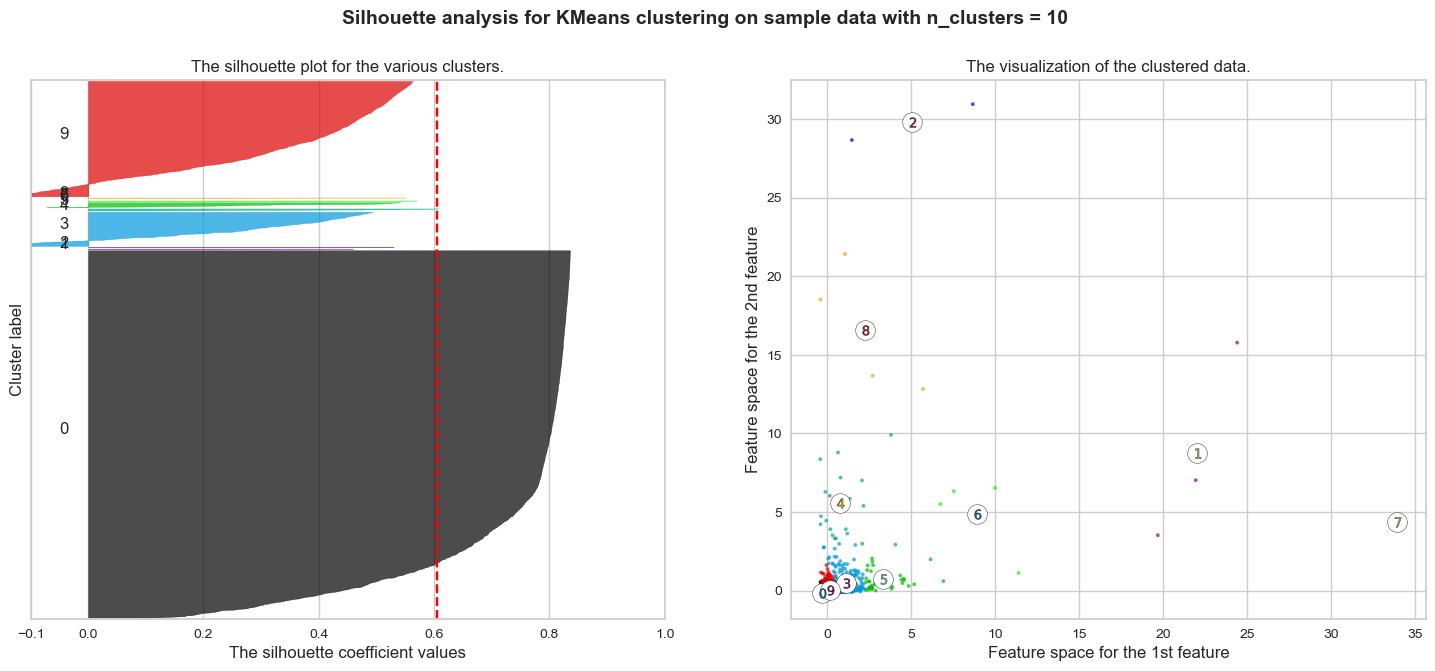

In [66]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is very good as compared to Recency and Monetary's Silhouette plot.*** 
* ***No datapoints are on the negative side of the Silhouette Coefficent values.***

##**So giving n_clusters=2 on Kmeans Model.**

In [67]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [68]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_Standardized  Frequency_Standardized  \
CustomerID                                                                   
12346.0               Silver              2.329388               -0.396578   
12347.0            Platinaum             -0.900588                0.394649   
12348.0                 Gold             -0.170593               -0.265435   
12349.0            Platinaum             -0.740589               -0.081836   
12350.0                Bronz              2.179389               -0.326635   
12352.0            Platinaum             -0.560591               -0.029379   
12353.0                Bronz              1.119397               -0.383463   
12354.0                 Gold              1.399395               -0.147407   
12355.0                Bronz              1.219396               -0.344121   
12356.0            Platinaum             -0.700590               -0.143035   

            Monetary_Standardized  Cluster_based_rec_mon  \
CustomerID                                                 
12346.0                  8.358668                      1   
12347.0                  0.250966                      0   
12348.0                 -0.028596                      0   
12349.0                 -0.033012                      0   
12350.0                 -0.191347                      1   
12352.0                  0.050263                      0   
12353.0                 -0.218650                      1   
12354.0                 -0.108461                      1   
12355.0                 -0.177440                      1   
12356.0                  0.084240                      0   

            Cluster_based_on_freq_mon  
CustomerID                             
12346.0                             0  
12347.0                             0  
12348.0                             0  
12349.0                             0  
12350.0                             0  
12352.0                             0  
12353.0                             0  
12354.0                             0  
12355.0                             0  
12356.0                             0

In [69]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[-0.03250175, -0.04148879],
       [10.81308313, 13.80299977]])

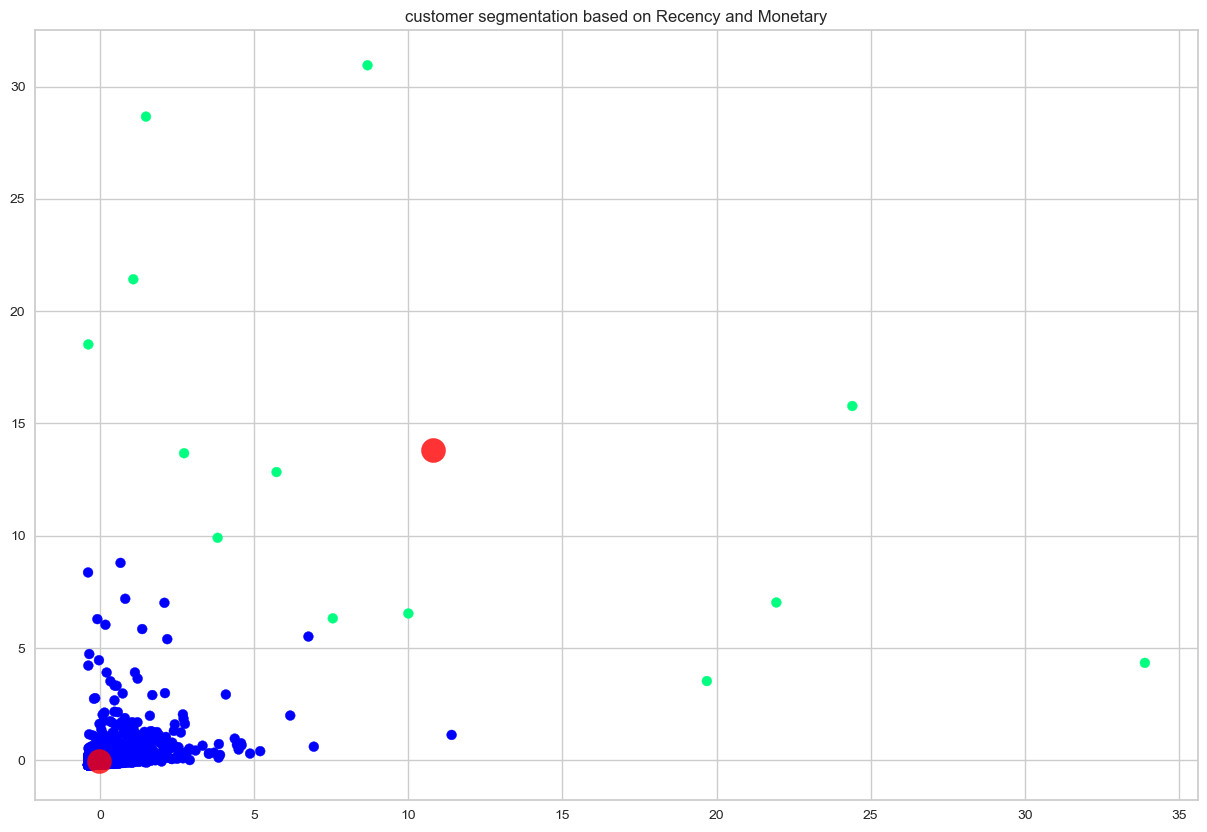

In [70]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

#***C) Applying Elbow Method on Recency, Frequency and Monetary.***

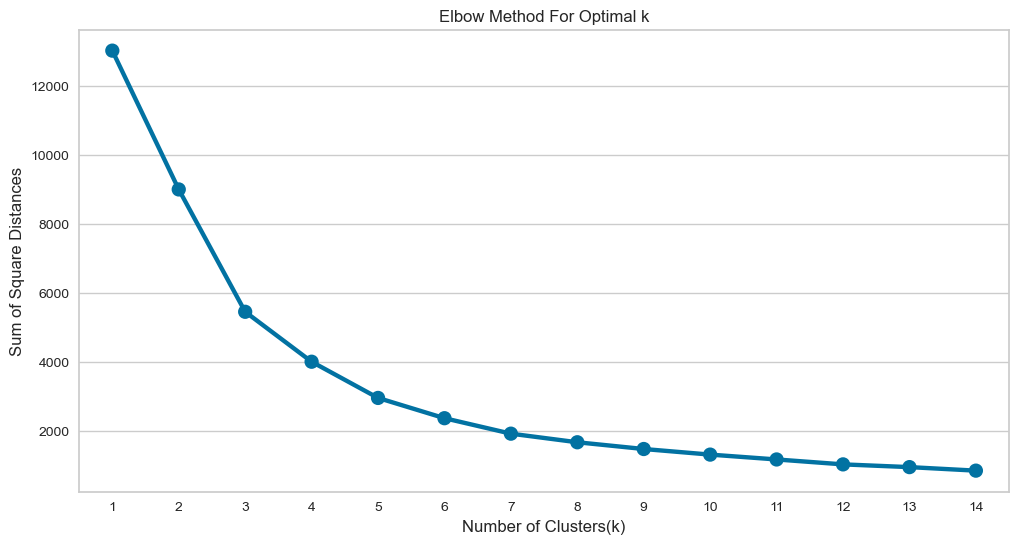

In [71]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_Frequency_Monetary_feat=['Recency_Standardized','Frequency_Standardized','Monetary_Standardized']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_Frequency_Monetary_feat].values

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## **Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [72]:
Recency_Frequency_Monetary_feat=['Recency_Standardized','Frequency_Standardized','Monetary_Standardized']
X=rfm_dataframe[Recency_Frequency_Monetary_feat].values
#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9311831163690153
For n_clusters = 3, silhouette score is 0.6018678448358707
For n_clusters = 4, silhouette score is 0.6008370824164462
For n_clusters = 5, silhouette score is 0.6152045126166208
For n_clusters = 6, silhouette score is 0.5899159601773434
For n_clusters = 7, silhouette score is 0.5241686786707341
For n_clusters = 8, silhouette score is 0.5108638975363265
For n_clusters = 9, silhouette score is 0.4255512439308196
For n_clusters = 10, silhouette score is 0.4289052219443333
For n_clusters = 11, silhouette score is 0.4320129138612604
For n_clusters = 12, silhouette score is 0.4316352843091693
For n_clusters = 13, silhouette score is 0.4182859265537471
For n_clusters = 14, silhouette score is 0.4335902778344398
For n_clusters = 15, silhouette score is 0.4152352951284207


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.9311831163690153
For n_clusters = 3 The average silhouette_score is : 0.6018678448358707
For n_clusters = 4 The average silhouette_score is : 0.6008370824164462
For n_clusters = 5 The average silhouette_score is : 0.6152045126166208
For n_clusters = 6 The average silhouette_score is : 0.5899159601773434
For n_clusters = 7 The average silhouette_score is : 0.5241686786707341
For n_clusters = 8 The average silhouette_score is : 0.5108638975363265
For n_clusters = 9 The average silhouette_score is : 0.4255512439308196
For n_clusters = 10 The average silhouette_score is : 0.4289052219443333


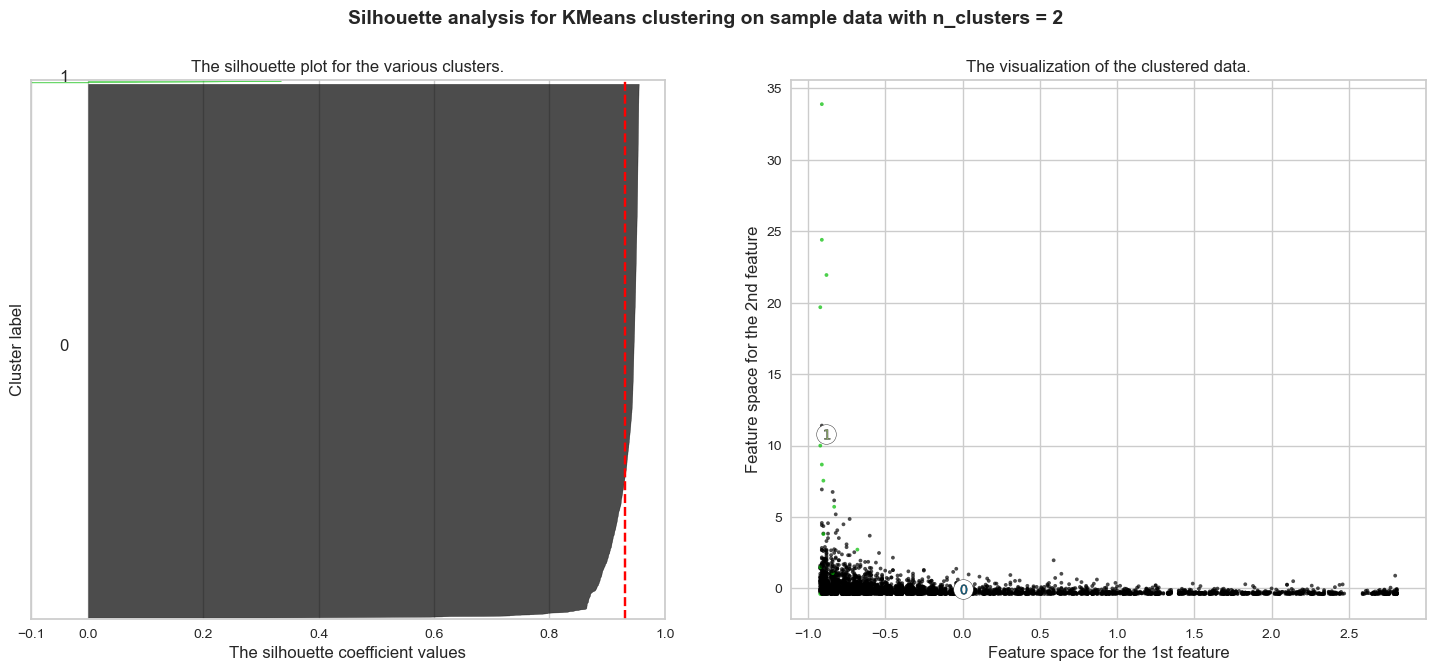

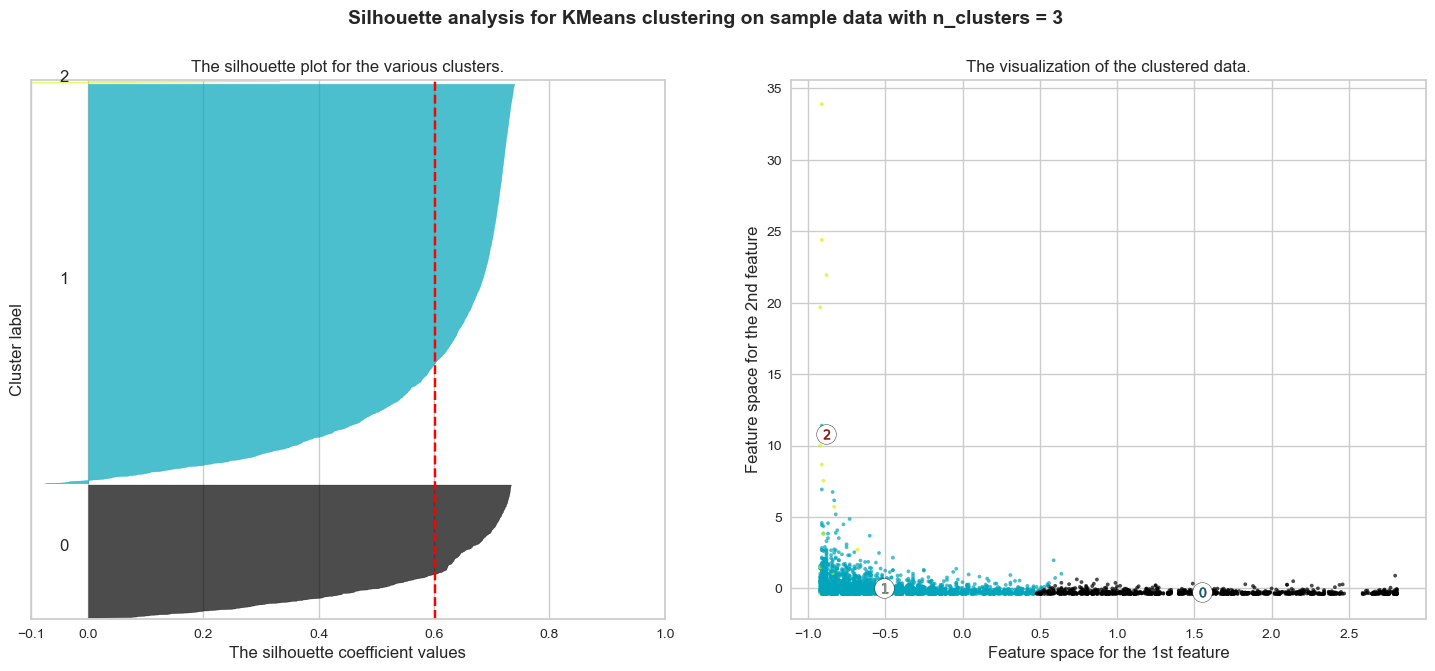

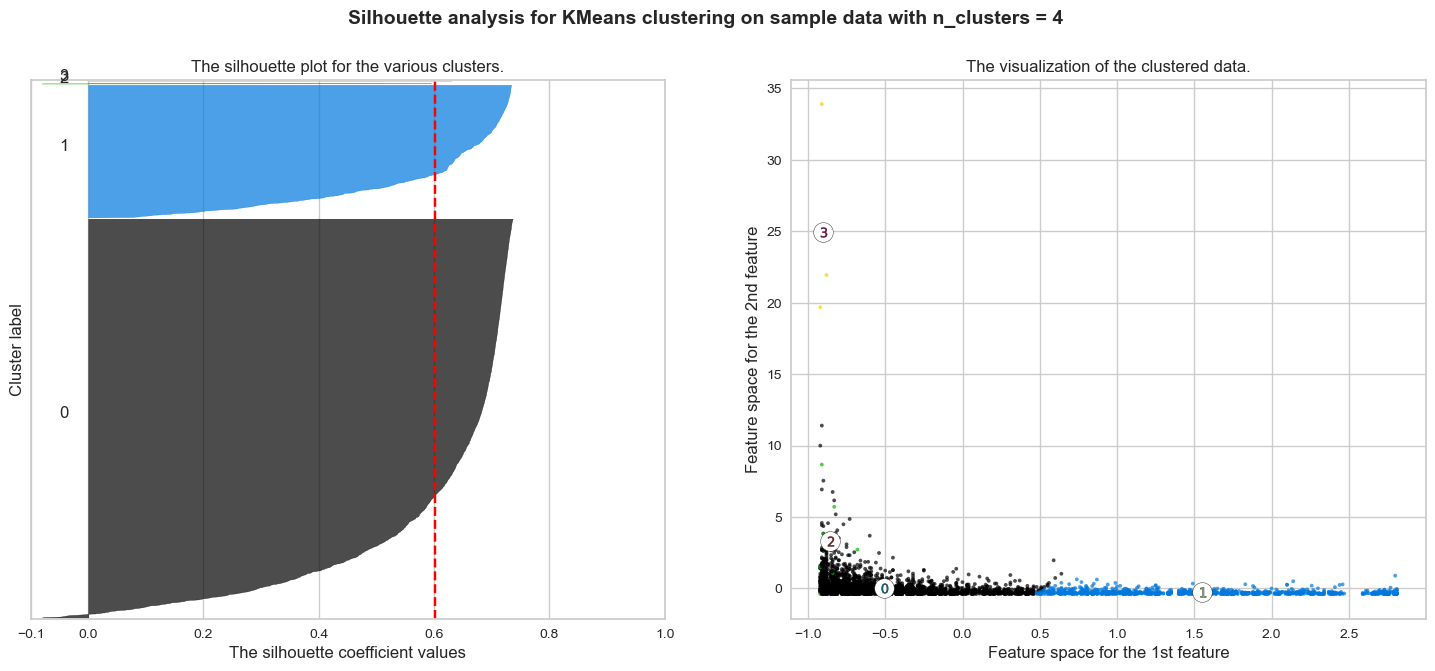

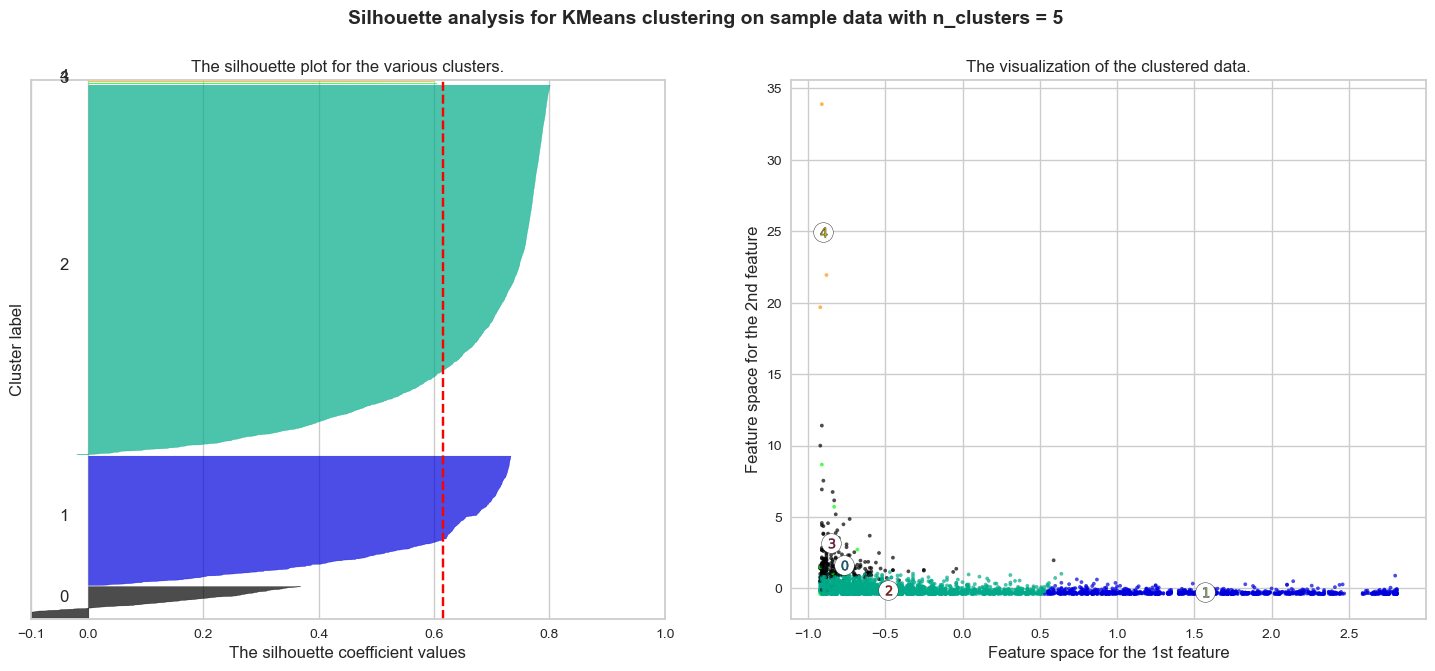

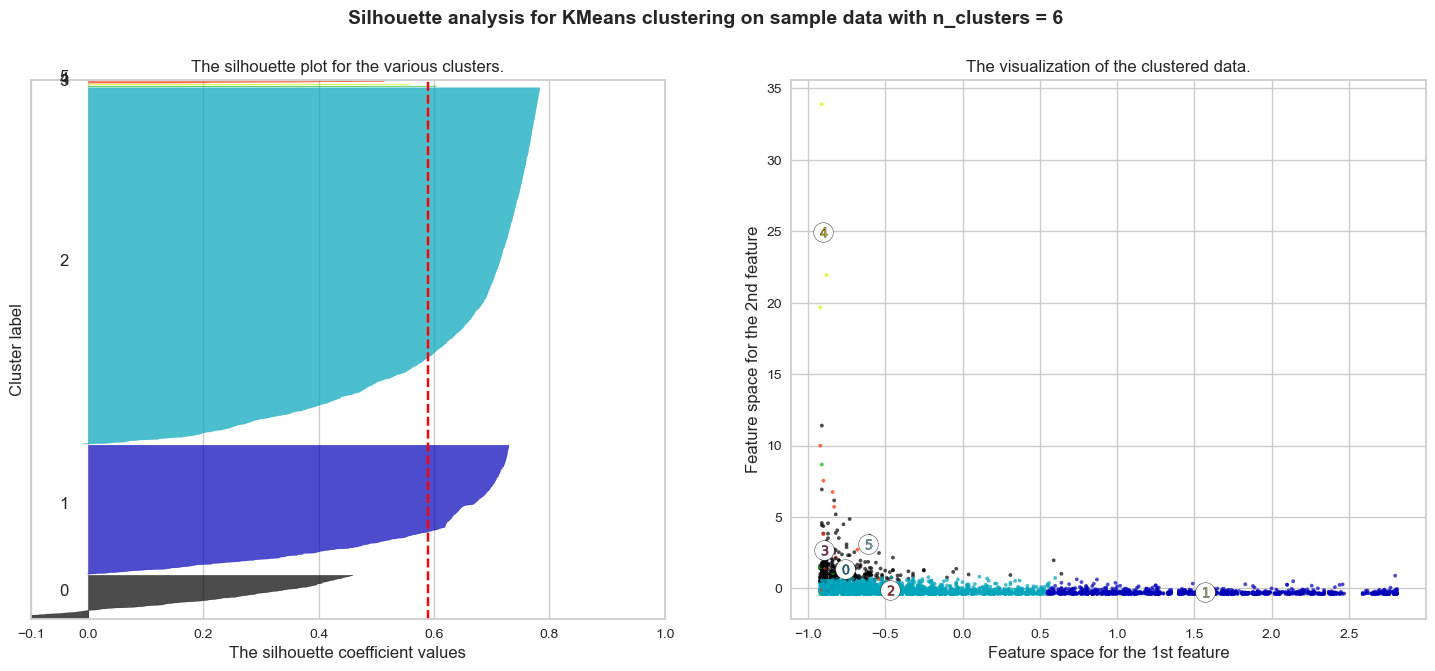

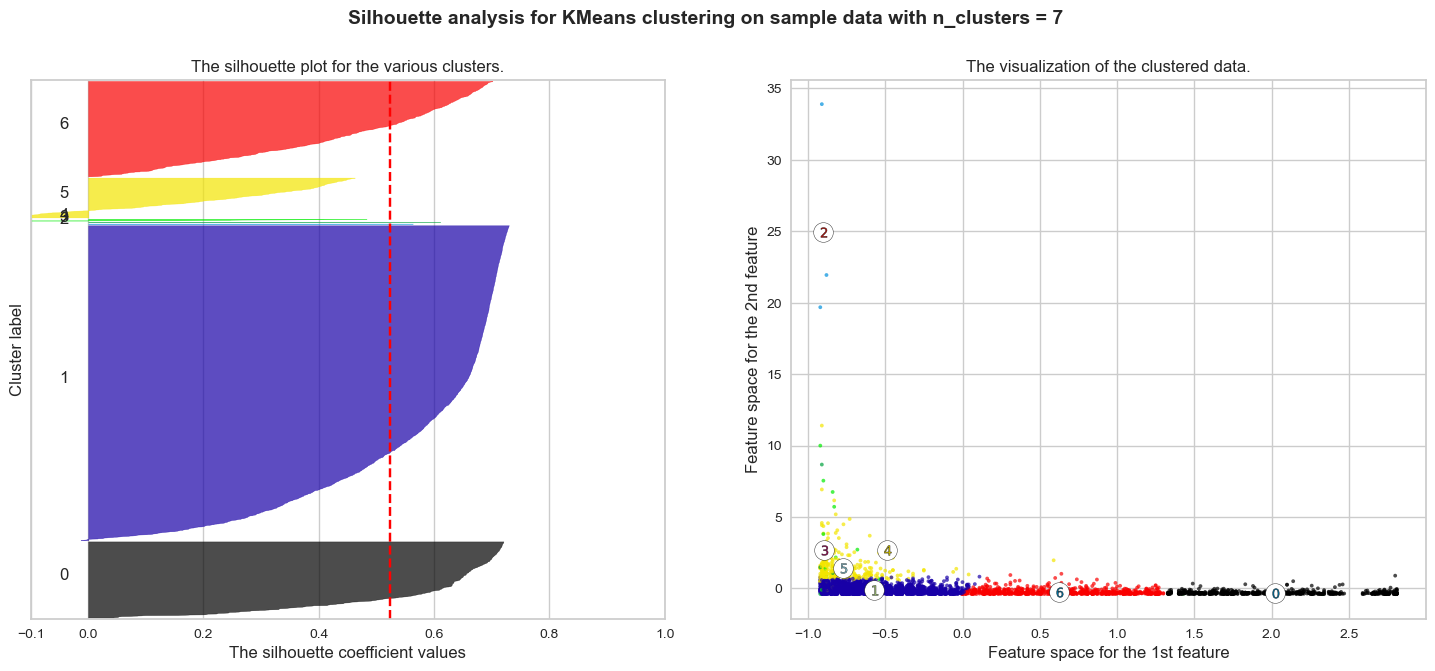

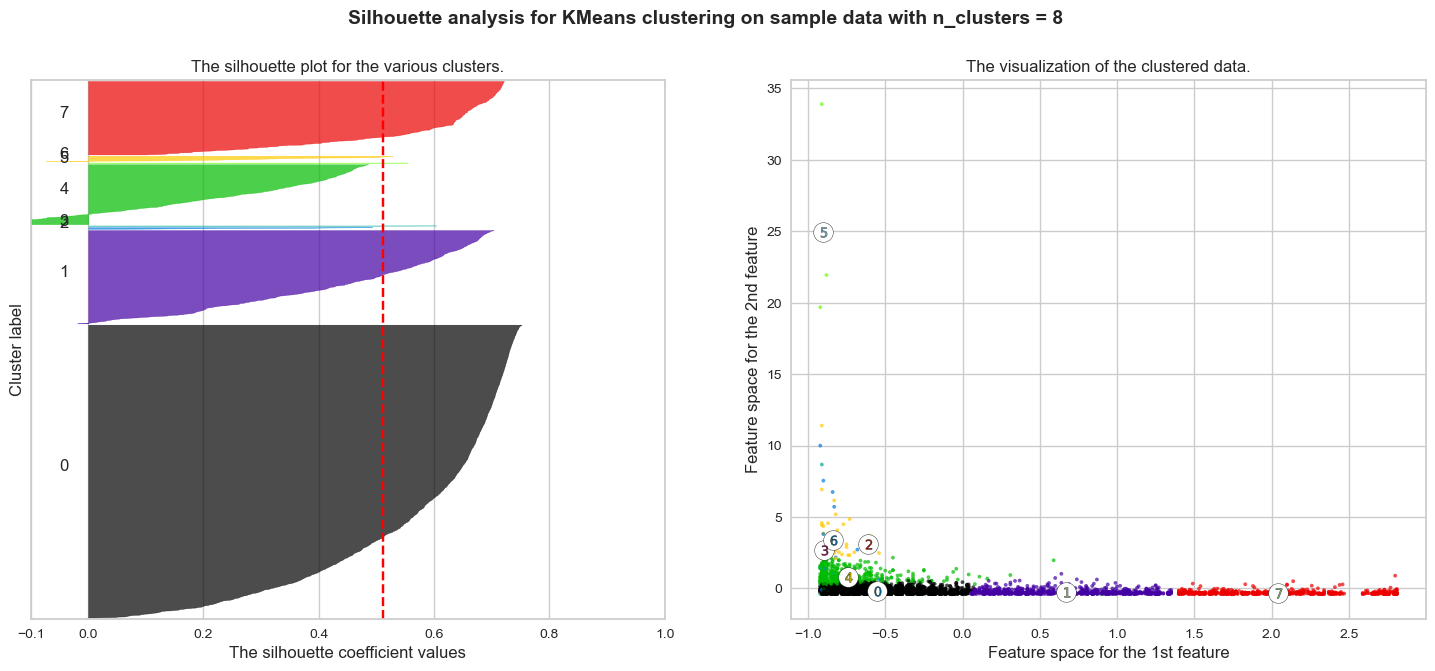

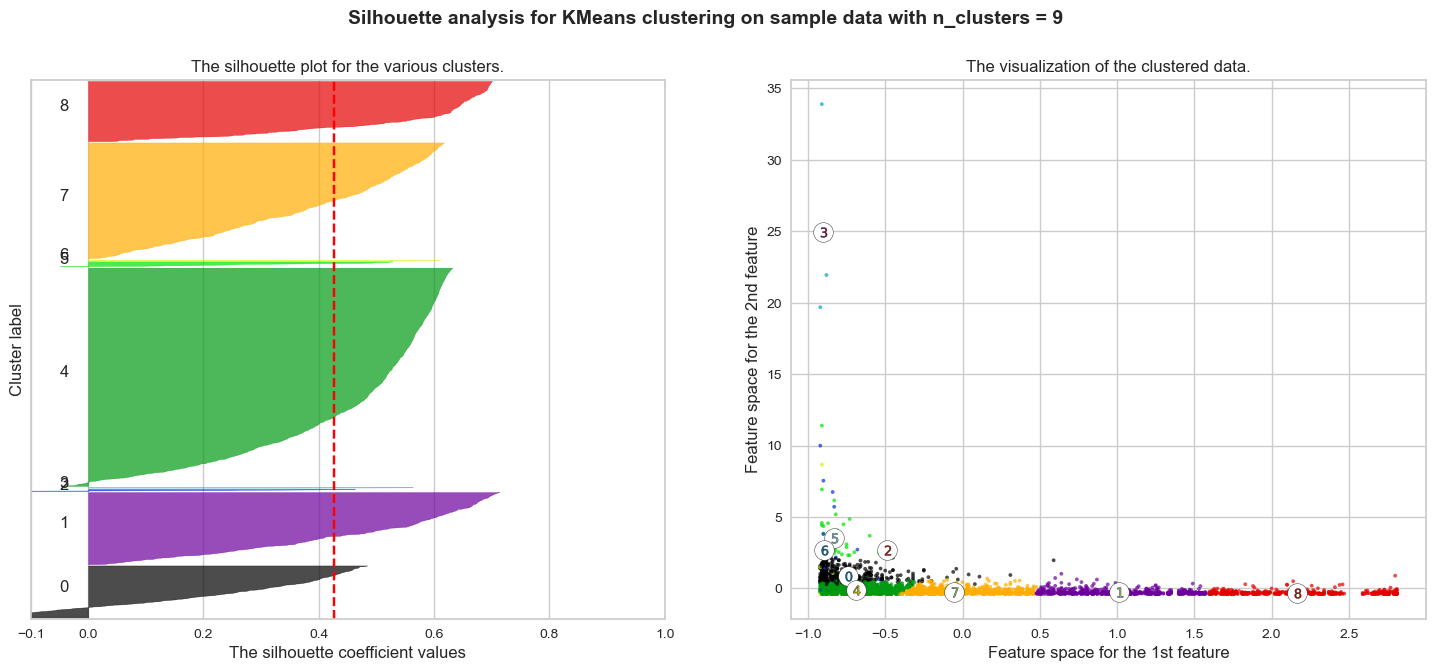

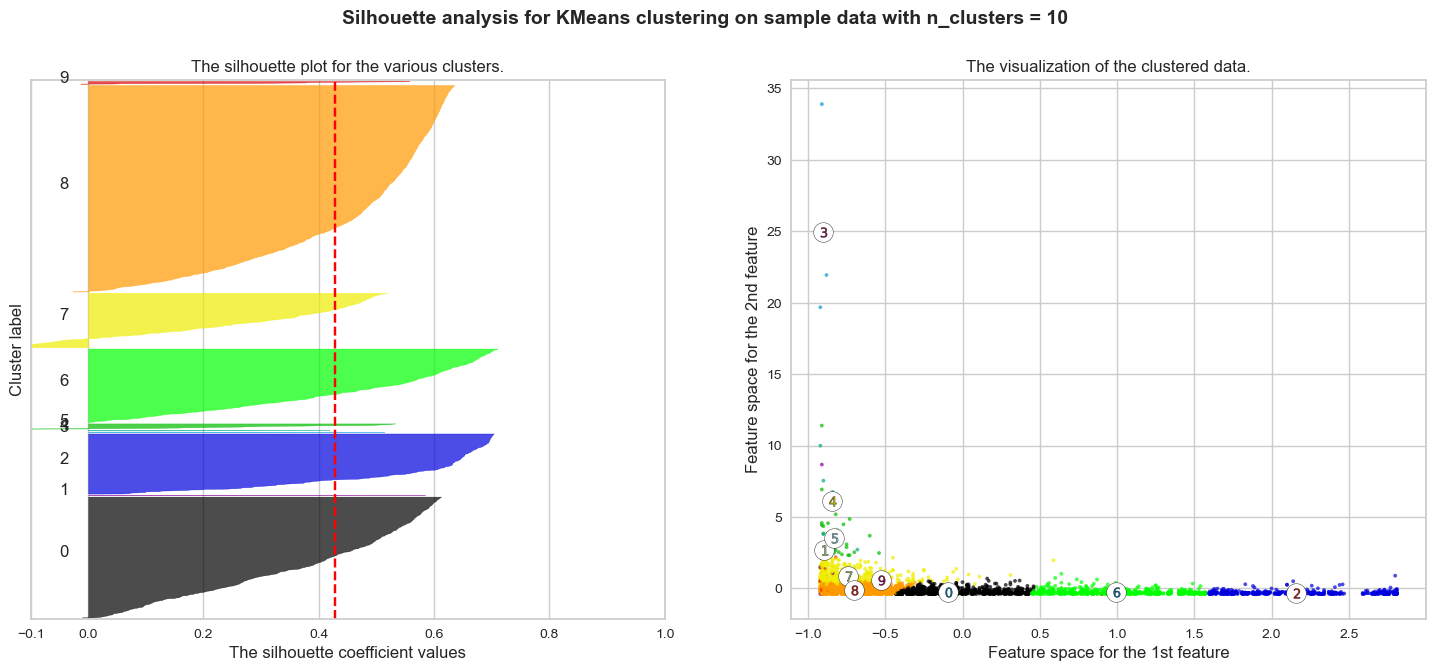

In [73]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is good.***
* ***Still Few datapoints are on the negative side of the Silhouette Coefficent values(see below image). Still we can consider the clusters***


In [74]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [75]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_Standardized  Frequency_Standardized  \
CustomerID                                                                   
12346.0               Silver              2.329388               -0.396578   
12347.0            Platinaum             -0.900588                0.394649   
12348.0                 Gold             -0.170593               -0.265435   
12349.0            Platinaum             -0.740589               -0.081836   
12350.0                Bronz              2.179389               -0.326635   
12352.0            Platinaum             -0.560591               -0.029379   
12353.0                Bronz              1.119397               -0.383463   
12354.0                 Gold              1.399395               -0.147407   
12355.0                Bronz              1.219396               -0.344121   
12356.0            Platinaum             -0.700590               -0.143035   

            Monetary_Standardized  Cluster_based_rec_mon  \
CustomerID                                                 
12346.0                  8.358668                      1   
12347.0                  0.250966                      0   
12348.0                 -0.028596                      0   
12349.0                 -0.033012                      0   
12350.0                 -0.191347                      1   
12352.0                  0.050263                      0   
12353.0                 -0.218650                      1   
12354.0                 -0.108461                      1   
12355.0                 -0.177440                      1   
12356.0                  0.084240                      0   

            Cluster_based_on_freq_mon  Cluster_based_on_freq_mon_rec  
CustomerID                                                            
12346.0                             0                              0  
12347.0                             0                              0  
12348.0                             0                              0  
12349.0                             0                              0  
12350.0                             0                              0  
12352.0                             0                              0  
12353.0                             0                              0  
12354.0                             0                              0  
12355.0                             0                              0  
12356.0                             0                              0

In [76]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 2.64685489e-03, -3.25017528e-02, -4.14887854e-02],
       [-8.80588262e-01,  1.08130831e+01,  1.38029998e+01]])

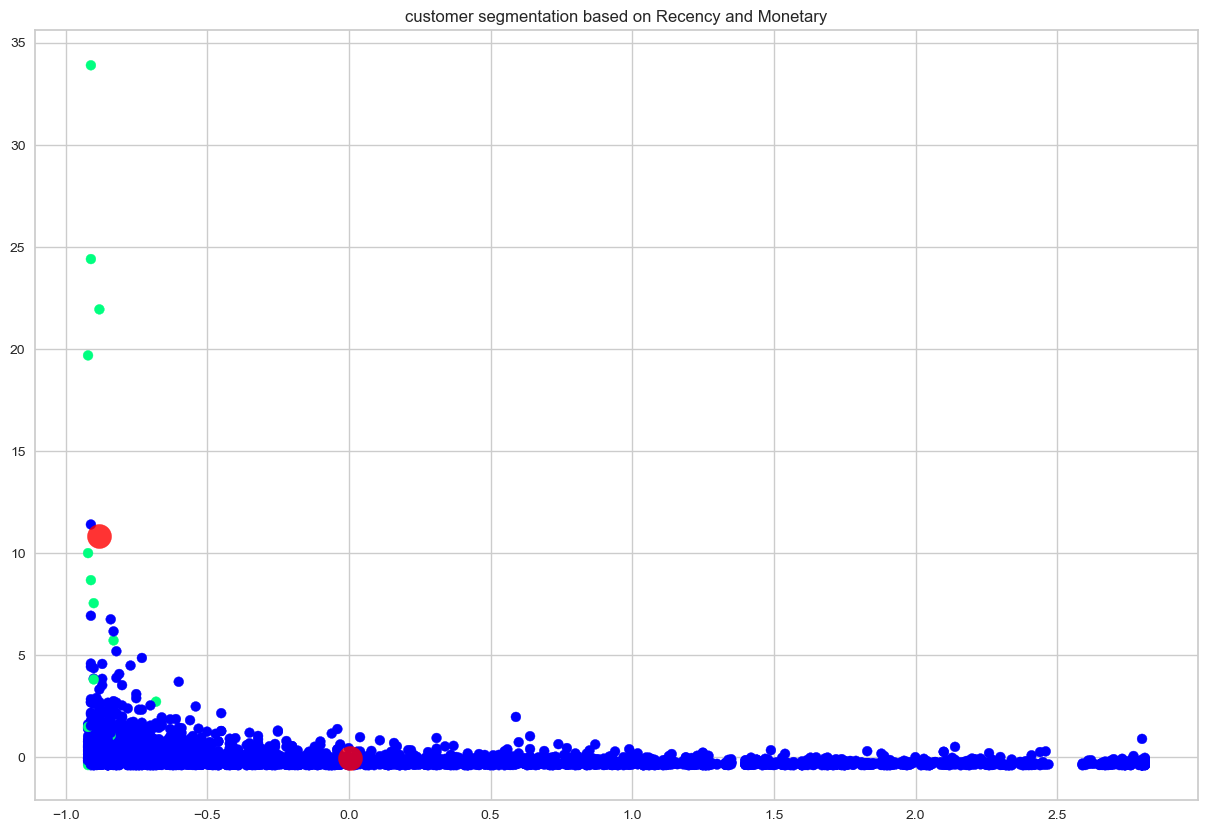

In [77]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **Hierarchical Clustering**

### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line). 

In [78]:
import scipy.cluster.hierarchy as sch

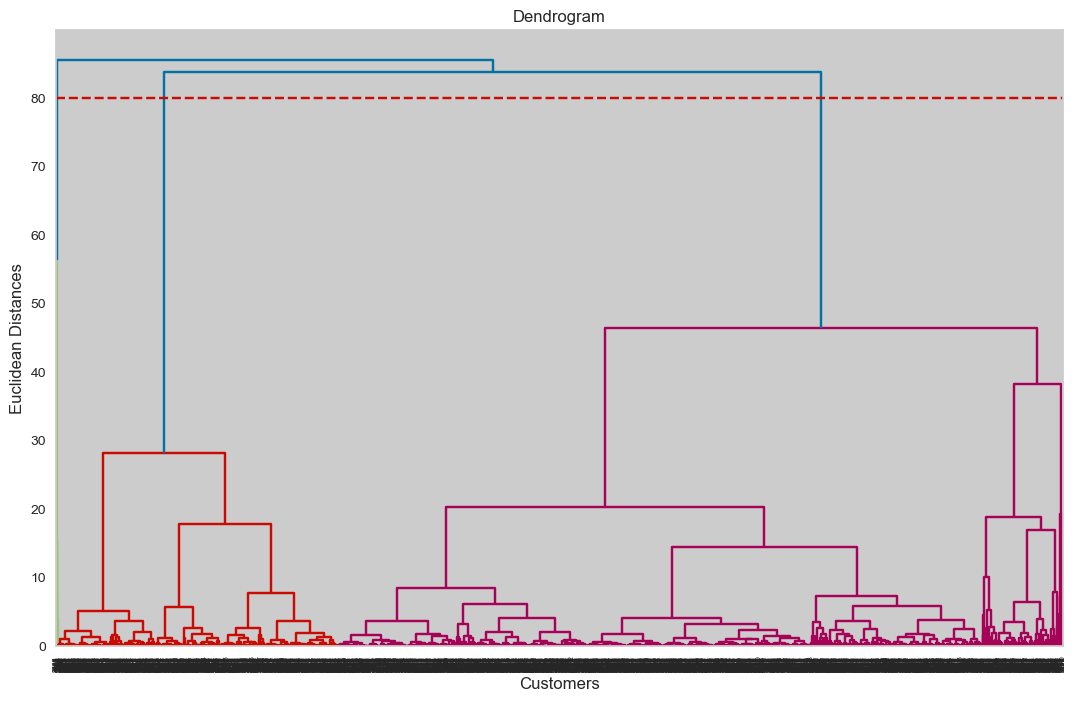

In [79]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 2

In [80]:
# Fitting hierarchical clustering to the online retail dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

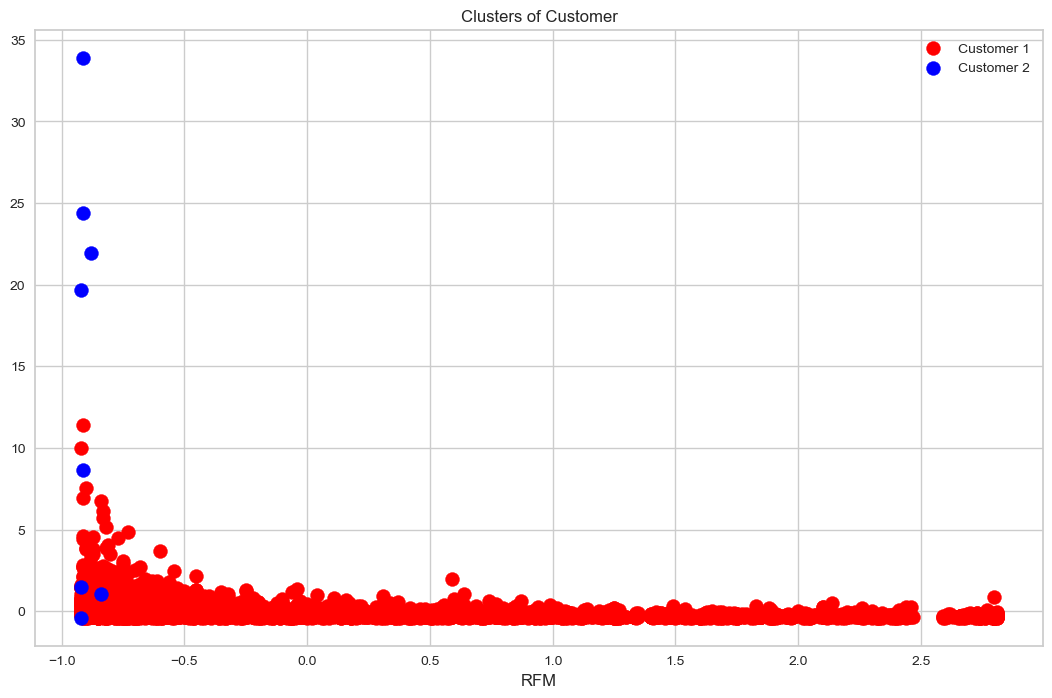

In [81]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

# Observation:

In [82]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [83]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronz                3.75     660.00   770

  * Platinum customers=1263 ( less recency but high  frequency and heavy spendings)
  * Gold customers=1324 (good recency,frequncy and moentary)
  * Silver customers=981(high recency, low frequency and low spendings)
  * Bronz customers=770 (very high recency but very less frequency and spendings)

In [85]:
data = [
    ['Model', 'Data', 'Number Of Cluster'],
    ['K Means with Elbow Method', 'Recency & Monetary', 3],
    ['K Means with Silhouette Score Method', 'Recency & Monetary', 2],
    ['K Means with Elbow Method', 'Frequency & Monetary', 3],
    ['K Means with Silhouette Score Method', 'Frequency & Monetary', 2],
    ['K Means with Elbow Method', 'Recency, Frequency & Monetary', 2],
    ['K Means with Silhouette Score Method', 'Recency, Frequency & Monetary', 2],
    ['Hierarchical Clustering', 'Recency, Frequency & Monetary', 2],

]

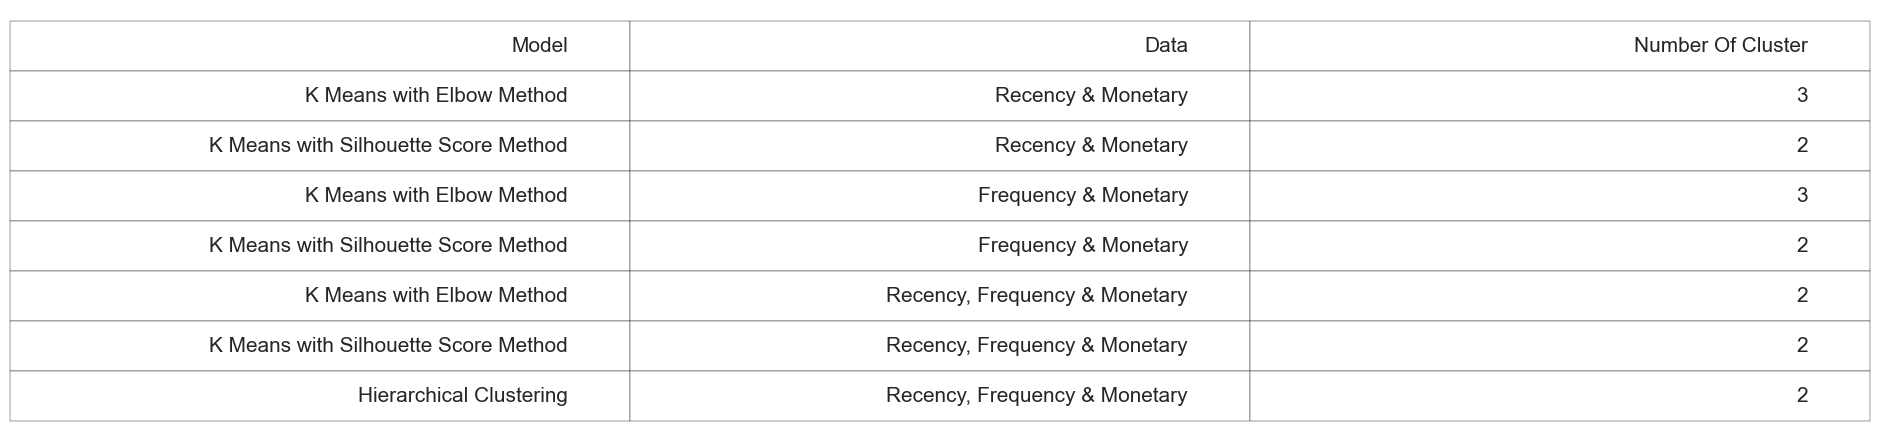

In [86]:
fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(3, 3)

ax.axis('off')

plt.show()

In [88]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_Standardized','Frequency_Standardized','Monetary_Standardized','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [89]:
data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency             Frequency            \
                                    mean min  max         mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                              92.324162   0  373    84.285549   1  2700   
1                               4.000000   0   24  2565.307692   3  7847   

                                    Monetary                             
                                        mean       min        max count  
Cluster_based_on_freq_mon_rec                                            
0                                1681.357196      3.75   81024.84  4325  
1                              126118.310000  33719.73  280206.02    13

* ***Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.***

* ***Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.***
* ***Cluster 1 has low recency rate but they are frequent buyers and spends  very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business***
